## Table of Contents

* [1. Introduction and Objectives](#1)
* [2. Basic Libraries and File Imports](#2)
* [3. Data Cleaning](#3)
* [4. Preprocessing, Exploratory Analysis and Feature Engineering](#4)
 * [4.1 addr_state](#4.1)
 * [4.2 annual_inc](#4.2)
 * [4.3 earliest_cr_line](#4.3)
 * [4.4 emp_length](#4.4)
 * [4.5 emp_title](#4.5)
 * [4.6 fico_range_high and fico_range_low](#4.6)
 * [4.7 grade and sub_grade](#4.7)
 * [4.8 home_ownership](#4.8)
 * [4.9 application_type](#4.9)

 * [4.10 initial_list_status](#4.10)
 * [4.11 int_rate](#4.11)
 * [4.12 loan_amnt](#4.12)
 * [4.13 num_actv_bc_tl](#4.13)
 * [4.14 mort_acc](#4.14)
 * [4.15 total_acc](#4.15)
 * [4.16 tot_cur_bal](#4.16)
 * [4.17 open_acc](#4.17)
 * [4.18 pub_rec](#4.18)
 * [4.19 pub_rec_bankruptcies](#4.19)
 * [4.20 purpose](#4.20)
 * [4.21 term](#4.21)
 * [4.22 title](#4.22)
 * [4.23 revol_bal](#4.23)
 * [4.24 revol_util](#4.24)
 * [4.25 verification_status](#4.25)
* [5. Scaling and Test Train split](#5)
* [6. Creating Models](#6)
 * [6.1 XGBoost](#6.1)
 * [6.2 Random Forests](#6.2)
 * [6.3 ANN](#6.3)
* [7. Conclusion](#7)

# 1. Introduction and Objectives
<a id="1"></a>

### Introduction

LendingClub is is a US peer-to-peer lending company and the world's largest peer-to-peer lending platform. According to Wikipedia,
> LendingClub is a peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. At its height, LendingClub was the world's largest peer-to-peer lending platform. The company claims that 15.98 billion in loans had been originated through its platform up to December 31, 2015. LendingClub enabled borrowers to create unsecured personal loans between 1,000 dollars and 40,000 dolars. The standard loan period was three years. Investors were able to search and browse the loan listings on LendingClub website and select loans that they wanted to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors made money from the interest on these loans. LendingClub made money by charging borrowers an origination fee and investors a service fee.

### Objectives

The aim of this project is to predict the chance that a loan will charge off, i.e., the customers who are not able to pay back the loan amount. Since customers who don't pay back their loan amount are a source of loss for the company, we want to build a model which predicts if a particular applicant will or will not be able to payback the loan amount. We are going to act as a data scientist for LendingClub for this particular project and try to search for potential solution for their problem. Ofcourse some domain knowledge is required but we will be skipping those features that are outside our understanding. Without further ado, let's directly jump onto solving the challenge!

# 2. Basic Libraries and File Imports
<a id="2"></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install categorical_encoder

In [ ]:
import categorical_encoder

In [4]:
import warnings
warnings.filterwarnings("ignore")

Check available files.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We will read the 'accepted_2007_to_2018Q4' data file from which we will source the necessary data.

In [6]:
# Add low_memory=False if there are RAM limitations
df = pd.read_csv("/content/drive/MyDrive/Loan_Data/loan_data.csv") # takes some time because of the length of file

In [7]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,74714191,NaN,28000.0,28000.0,28000.0,36 months,6.49,858.05,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,76245151,NaN,6300.0,6300.0,6300.0,36 months,11.47,207.66,B,...,NaN,NaN,Cash,Y,Sep-2018,COMPLETE,Jun-2018,1370.59,40.0,3.0
2,2,5715736,NaN,24000.0,24000.0,24000.0,60 months,12.12,535.33,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,41031416,NaN,28000.0,28000.0,28000.0,60 months,10.99,608.65,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,97560367,NaN,20000.0,20000.0,20000.0,36 months,11.49,659.43,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(df)

452140

In [9]:

df['loan_status'].value_counts()

Fully Paid                                             215046
Current                                                175881
Charged Off                                             53668
Late (31-120 days)                                       4397
In Grace Period                                          1667
Late (16-30 days)                                         897
Does not meet the credit policy. Status:Fully Paid        414
Does not meet the credit policy. Status:Charged Off       157
Default                                                     7
Name: loan_status, dtype: int64

In [10]:
# We will drop rows which have loan_status other than Fully Paid and Charged Off
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

<Axes: xlabel='loan_status', ylabel='count'>

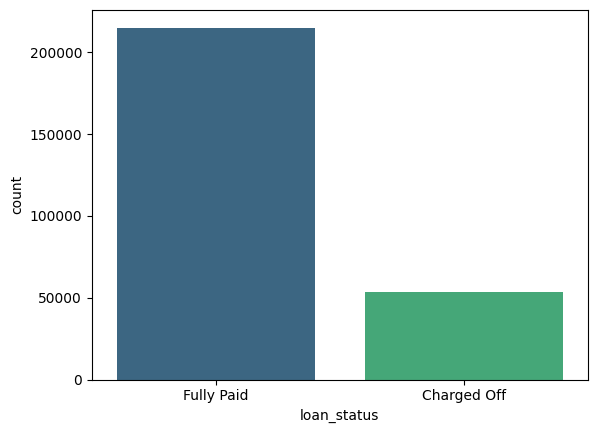

In [11]:
# lets check if loan_status now has only fully paid and charged off
sns.countplot(x=df['loan_status'], data=df, palette='viridis')

In [12]:
df.loan_status.value_counts(normalize=True)

Fully Paid     0.800278
Charged Off    0.199722
Name: loan_status, dtype: float64

It is imbalanced.

# 3. Data Cleaning
<a id="3"></a>

% of null values in each column sorted in descending order of missing values.

In [13]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

member_id                                     100.000000
next_pymnt_d                                  100.000000
orig_projected_additional_accrued_interest     99.716799
hardship_start_date                            99.569431
hardship_end_date                              99.569431
                                                 ...    
pub_rec                                         0.000000
open_acc                                        0.000000
inq_last_6mths                                  0.000000
fico_range_high                                 0.000000
Unnamed: 0                                      0.000000
Length: 152, dtype: float64

 % of missing values.

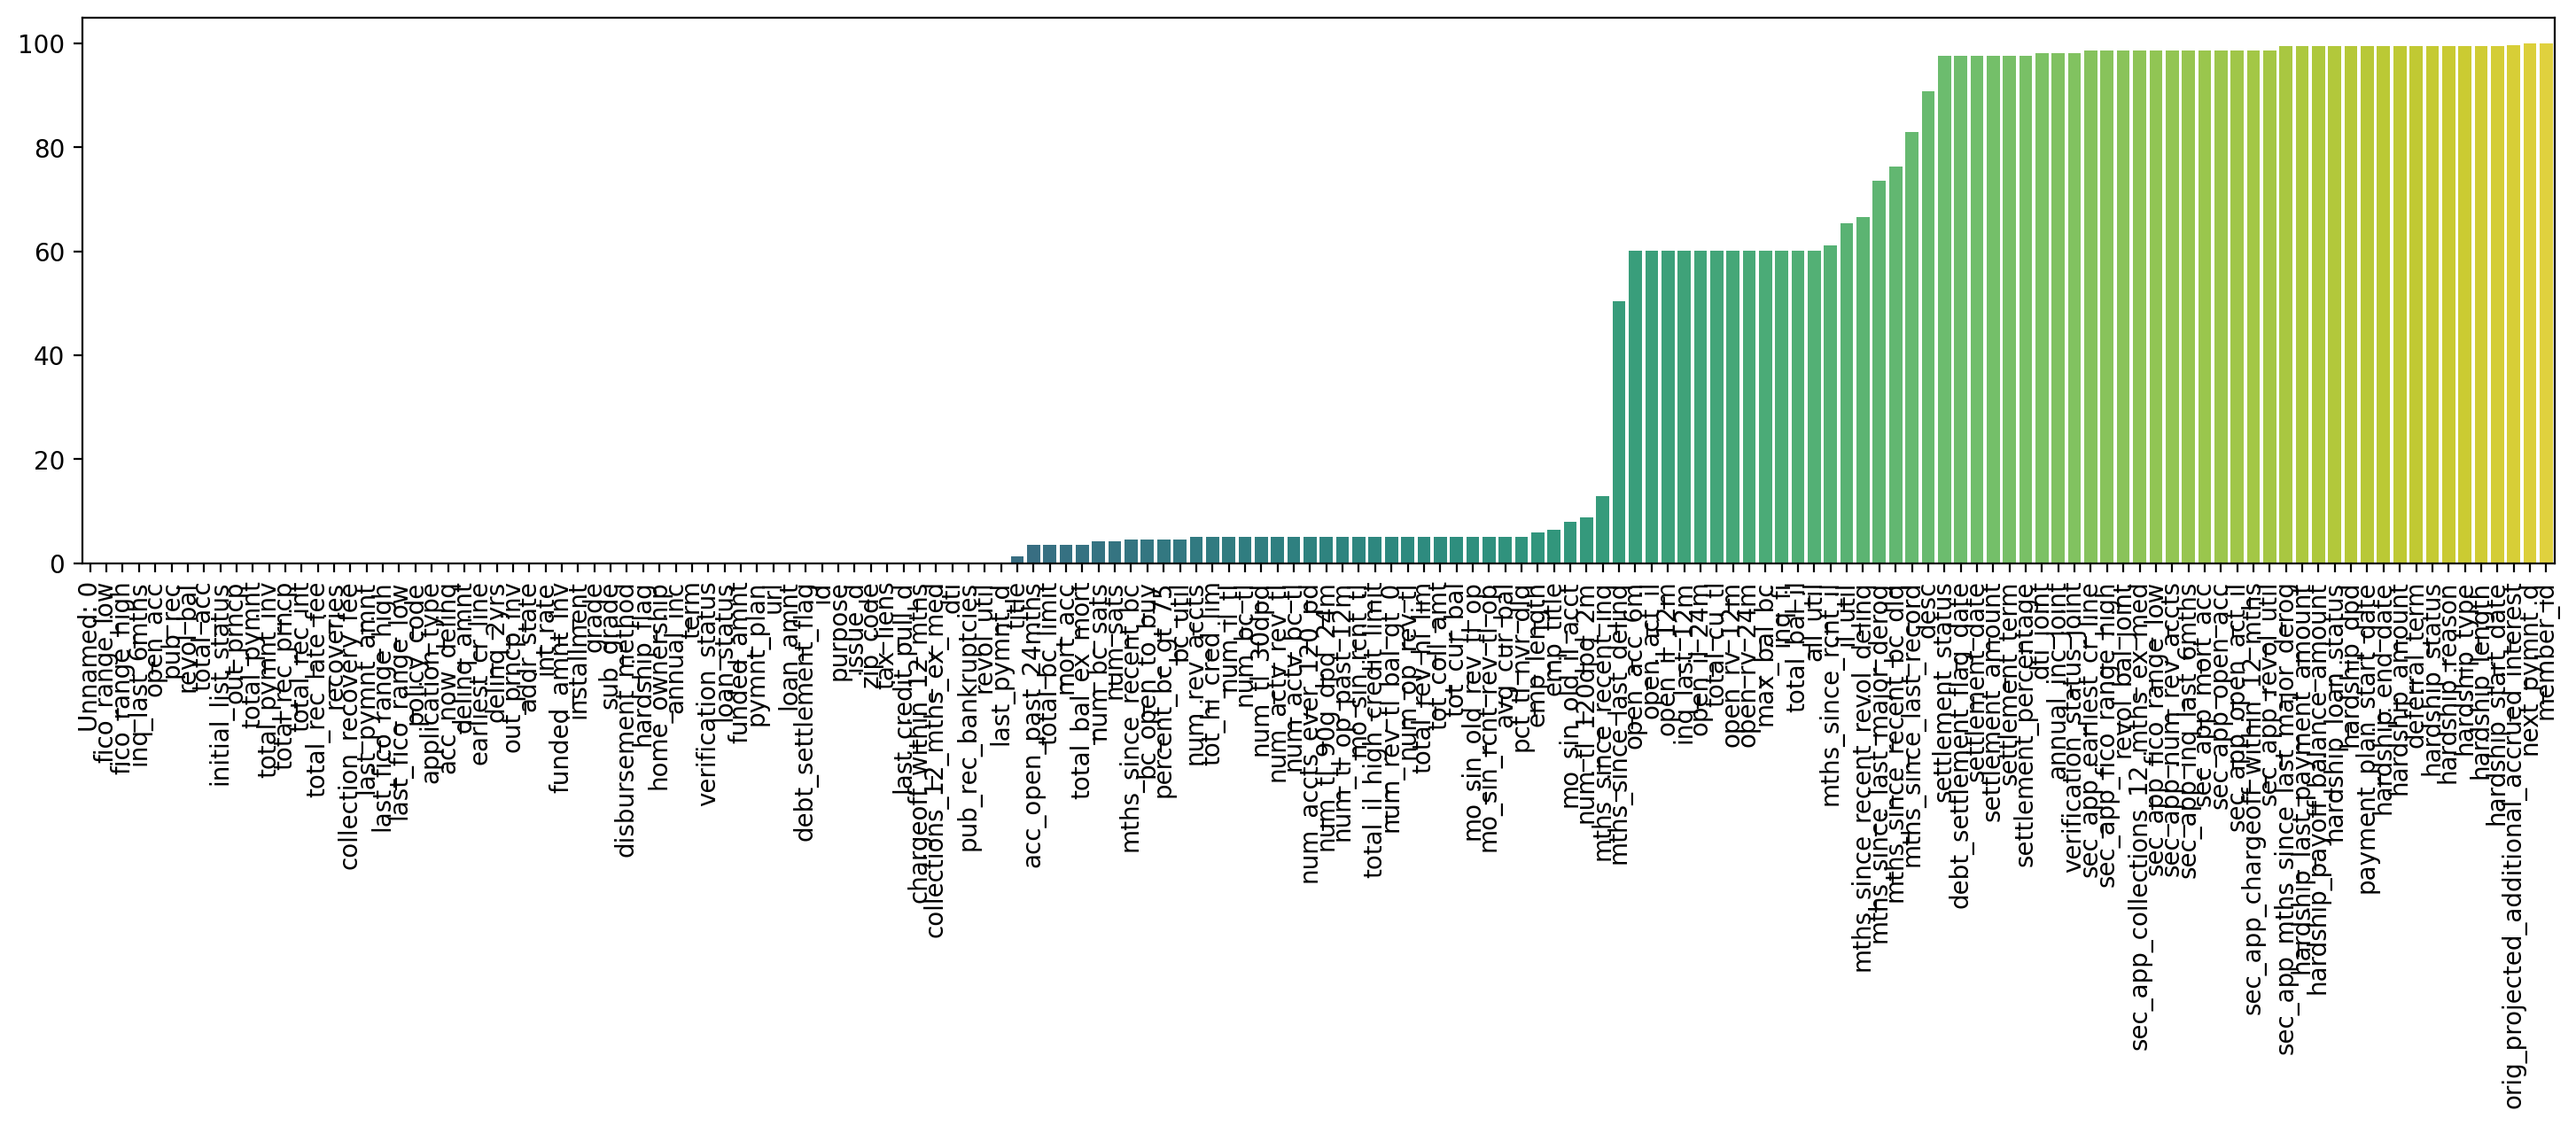

In [14]:
plt.figure(figsize=(18,4),dpi=200) # make image larger and clearer
# y contains the % of missing values od each column and x is the index of the series in above cell
sns.barplot(y=((df.isnull().sum()/len(df))*100).sort_values(), x=((df.isnull().sum()/len(df))*100).sort_values().index, palette='viridis')
plt.xticks(rotation=90); # to rotate x-axis labels from horizontal to vertical

Lets drop the features with 50% or more missing data since, 1. It is difficult to fill in values for so many missing rows, 2. There are 151 features, so better to work with limited features and avoid with missing ones.

In [15]:
keep = df.columns[((df.isnull().sum()/len(df))*100 < 50)].to_list()
keep # list of columns to be kept

['Unnamed: 0',
 'id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 

In [16]:
len(keep)

94

In [17]:
df = df[keep] # dropping features with 50% or more missing data

In [275]:
df.shape

(253655, 119)

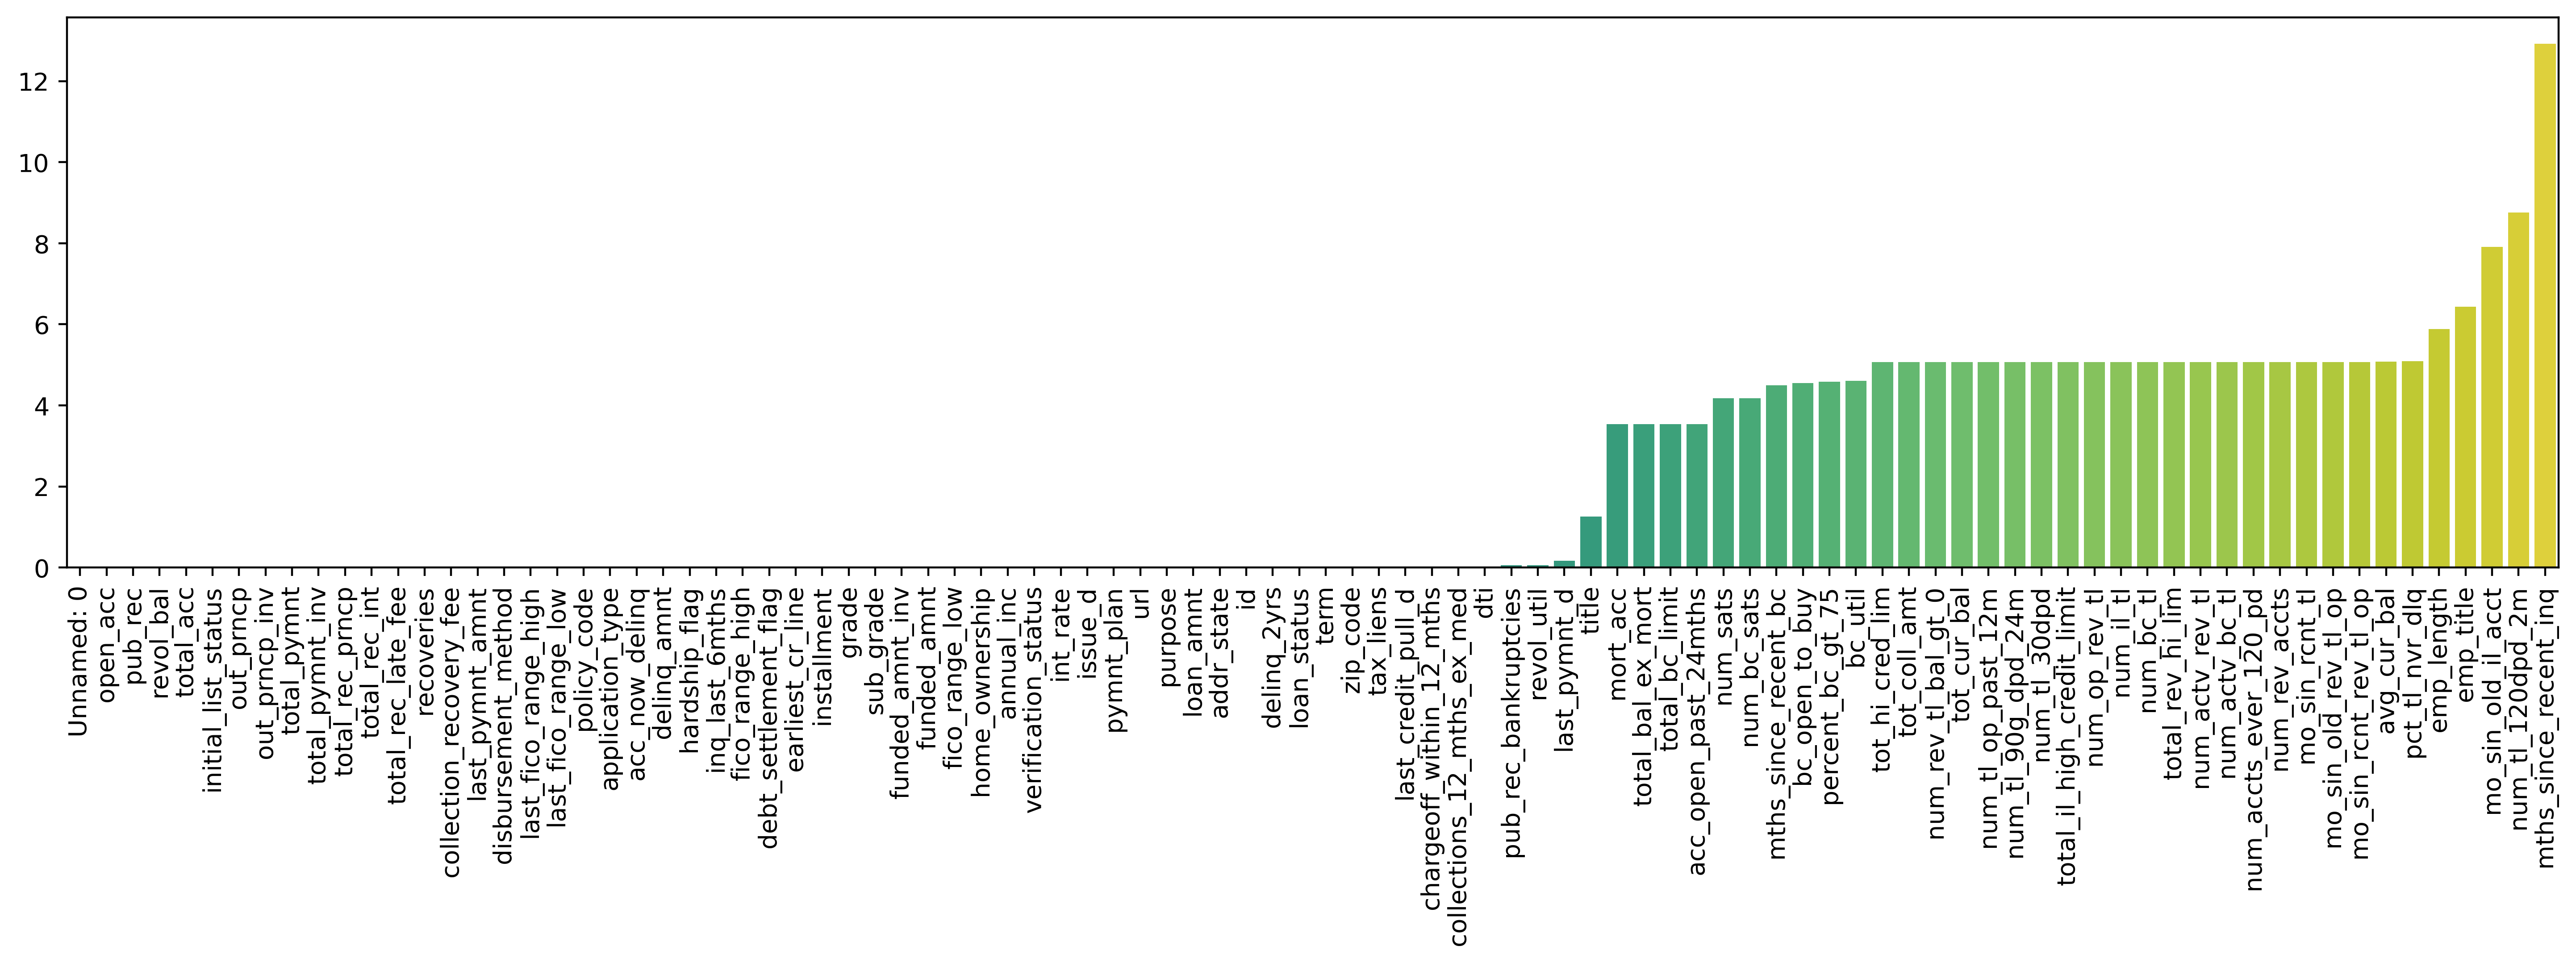

In [19]:
plt.figure(figsize=(18,4),dpi=400)
sns.barplot(y=((df.isnull().sum()/len(df))*100).sort_values(), x=((df.isnull().sum()/len(df))*100).sort_values().index, palette='viridis')
plt.xticks(rotation=90);

 Not all features will be available to us before a person gets loan. \
Some features will only be available after a person gets a loan. We have the following features we will be proceeding with:

In [20]:
final_features = ['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'application_type',
                    'initial_list_status', 'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'loan_status', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies',
                    'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status']

In [21]:
df = df[final_features]

In [22]:
df.shape
# We now have 27 features to play with (loan_status is the output)

(268714, 28)

# 4. Preprocessing, Exploratory Analysis and Feature Engineering
<a id="4"></a>

In [23]:
df.dtypes.value_counts()

object     14
float64    14
dtype: int64

There are 14 categorical features currently.

In [24]:
df['loan_status'] # The feature we need to predict

0          Fully Paid
1         Charged Off
2          Fully Paid
3         Charged Off
4          Fully Paid
             ...     
452132     Fully Paid
452134     Fully Paid
452136     Fully Paid
452137    Charged Off
452138     Fully Paid
Name: loan_status, Length: 268714, dtype: object

Create dummies for loan_status so that correlation can be calculated wrt to loan_status for other continuous features.

In [25]:
df_temp = df.copy() # copy so that it does not affect the original data frame
df_temp['loan_status'] = pd.get_dummies(df_temp['loan_status'], drop_first=True,dtype=int)

In [26]:
df_temp.loan_status.value_counts()

1    215046
0     53668
Name: loan_status, dtype: int64

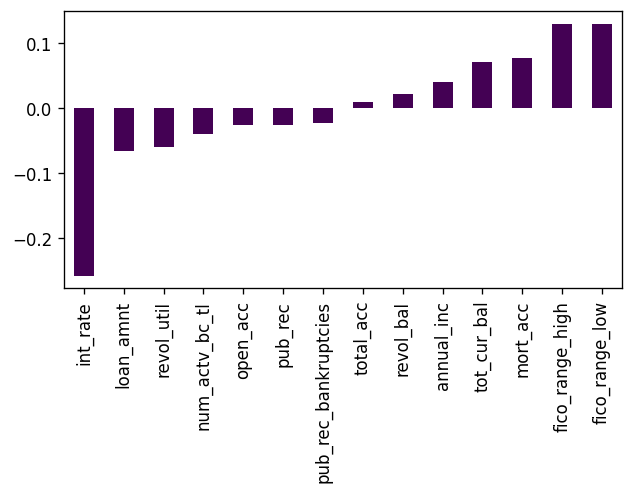

In [27]:
plt.figure(figsize=(6,3),dpi=120)
df_temp.corr()['loan_status'].sort_values().drop('loan_status').plot(kind='bar', cmap='viridis') # correlation with loan_status for continuous features with loan_status feature dropped
plt.xticks(rotation=90);

int_rate, fico_range_high and fico_range_low are highly correlated with loan_status compared to other features.

identifying features with missing values.

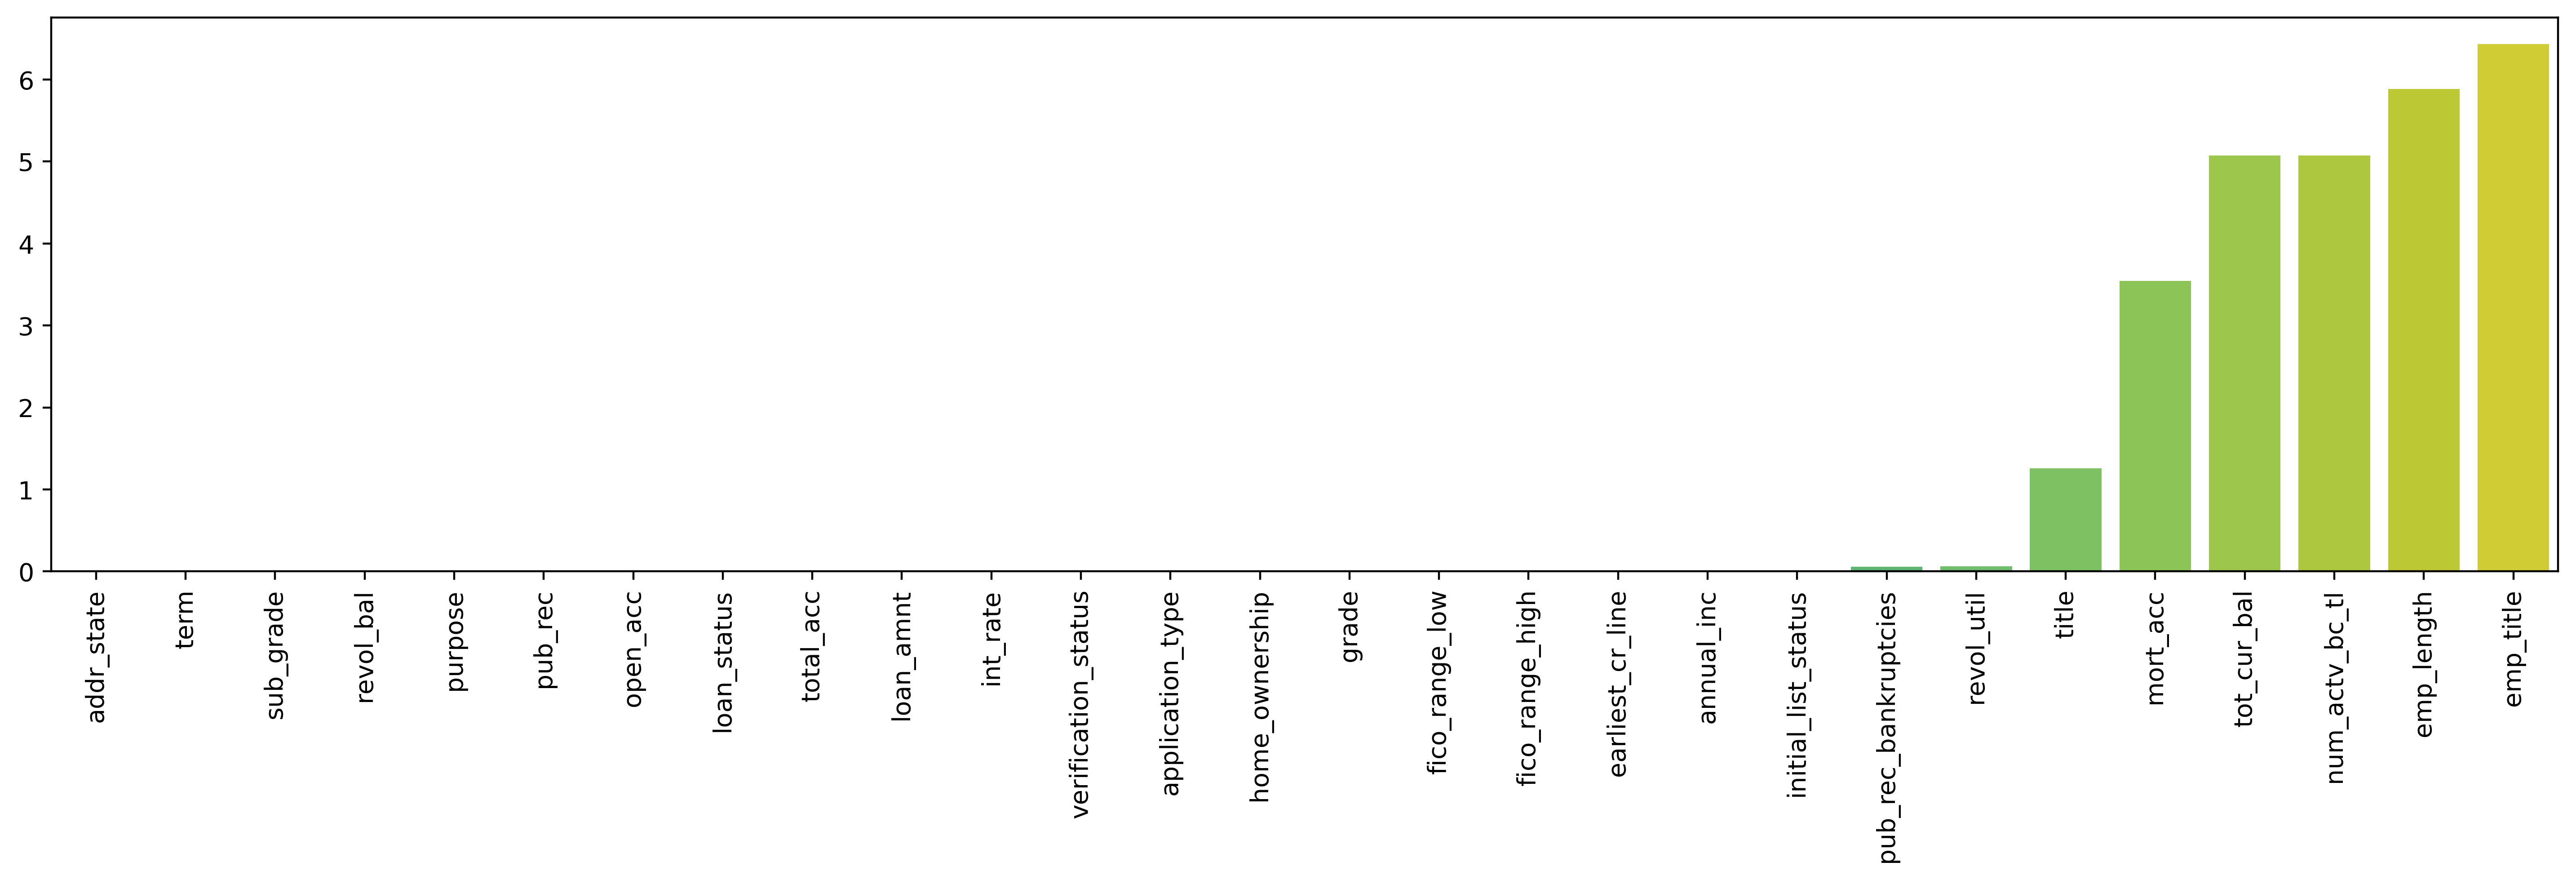

In [28]:
plt.figure(figsize=(18,4),dpi=400)
sns.barplot(y=((df.isnull().sum()/len(df))*100).sort_values(), x=((df.isnull().sum()/len(df))*100).sort_values().index, palette='viridis')
plt.xticks(rotation=90);

Columns with missing values and % of missing values.

In [29]:
df_missing = ((df.isnull().sum()/len(df))*100)[((df.isnull().sum()/len(df))*100) > 0]
df_missing

emp_length              5.886556
emp_title               6.434350
num_actv_bc_tl          5.074168
mort_acc                3.543917
tot_cur_bal             5.074168
pub_rec_bankruptcies    0.054705
revol_util              0.063264
title                   1.257471
dtype: float64

function to check % of missing data for a particular column.

In [30]:
def if_null_values(feat_name):
    if feat_name in df_missing:
        return(f"% of missing values = {df_missing[feat_name].round(2)}")
    else:
        return("No missing values")

Let us examine each feature, drop those which seem unimportant and create dummies for the ones which are categorical.

## 4.1 addr_state
<a id="4.1"></a>

The state provided by the borrower in the loan application.

In [31]:
if_null_values('addr_state')

'No missing values'

In [32]:
df['addr_state'].unique() # unique values in this feature

array(['OH', 'CT', 'CA', 'FL', 'IL', 'TX', 'NY', 'MA', 'NV', 'VA', 'AZ',
       'TN', 'NC', 'MD', 'NH', 'WA', 'MI', 'WI', 'GA', 'DC', 'IN', 'MN',
       'MO', 'PA', 'OK', 'ME', 'NJ', 'NM', 'DE', 'KY', 'CO', 'LA', 'NE',
       'MT', 'KS', 'HI', 'WV', 'VT', 'AL', 'UT', 'SC', 'AR', 'OR', 'ND',
       'SD', 'MS', 'RI', 'ID', 'AK', 'WY', 'IA'], dtype=object)

In [33]:
len(df['addr_state'].unique())

51

In [34]:
df['addr_state'].value_counts()

CA    38852
NY    22130
TX    22045
FL    19187
IL    10360
NJ     9694
PA     9106
OH     8813
GA     8757
NC     7598
VA     7555
MI     6890
AZ     6601
MD     6113
MA     6055
CO     5924
WA     5815
MN     4841
IN     4365
MO     4210
TN     4120
NV     4039
CT     4018
WI     3588
AL     3317
OR     3243
SC     3207
LA     3065
KY     2599
OK     2472
KS     2284
AR     2040
UT     1884
NM     1463
MS     1377
HI     1363
NH     1267
RI     1256
WV      956
MT      789
DE      739
DC      692
NE      687
AK      673
WY      562
VT      523
SD      515
ME      393
ID      338
ND      333
IA        1
Name: addr_state, dtype: int64

In [276]:
df.filter(items=["loan_status"])

,loan_status
0,1
1,0
2,1
4,1
5,1
...,...
452132,1
452134,1
452136,1
452137,0


In [36]:
add_state_dummies = pd.get_dummies(df['addr_state'], drop_first=True) # drop_first will drop the first dummy column
add_state_dummies

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452132,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
452134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Drop 'addr_state' feature and concat 'add_state_dummies' to df.

In [37]:
df = pd.concat([df.drop('addr_state', axis=1), add_state_dummies], axis=1)

## 4.2 annual_inc
<a id="4.2"></a>

The self-reported annual income provided by the borrower during registration.

In [38]:
if_null_values('annual_inc')

'No missing values'

In [39]:
df['annual_inc'].describe()

count    2.687140e+05
mean     7.624293e+04
std      7.628191e+04
min      0.000000e+00
25%      4.560000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

Plot the distribution of annual incomes

<Axes: ylabel='Density'>

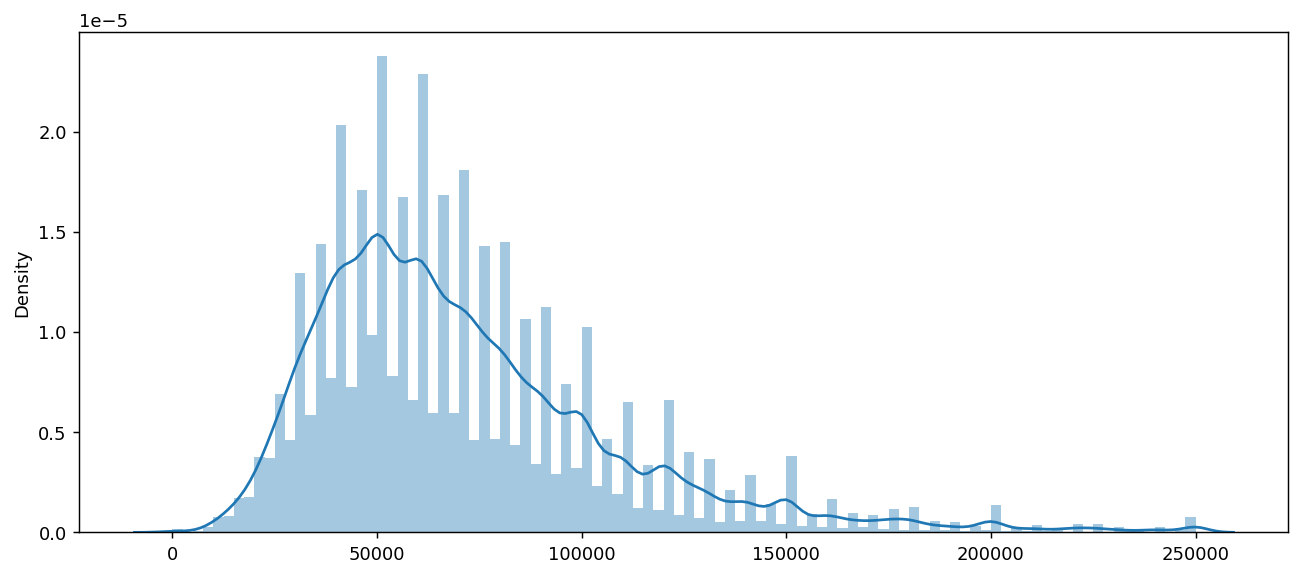

In [278]:
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=df['annual_inc'], bins=100)

The salary distribution is highly skewed towards right.<br>
Let's find how many customers have annual_inc > $200000.

In [284]:
len(df[df['annual_inc'] > 200000])

2296

% of rows with annual income > $150000.

In [285]:
percent_of_rows_of_customers_with_annual_inc_more_than_150000 = 2296*100/len(df)

In [286]:
percent_of_rows_of_customers_with_annual_inc_more_than_150000

0.9051664662632316

There are 2296 rows of customers with annual_inc > 200000, i.e., approx 1%. Since these are outliers, let's drop these rows.

Lets remove the rows with annual_inc > $200000

In [287]:
df = df[df['annual_inc'] <= 200000]

In [288]:
len(df)

251359

Let's check the distribution now.

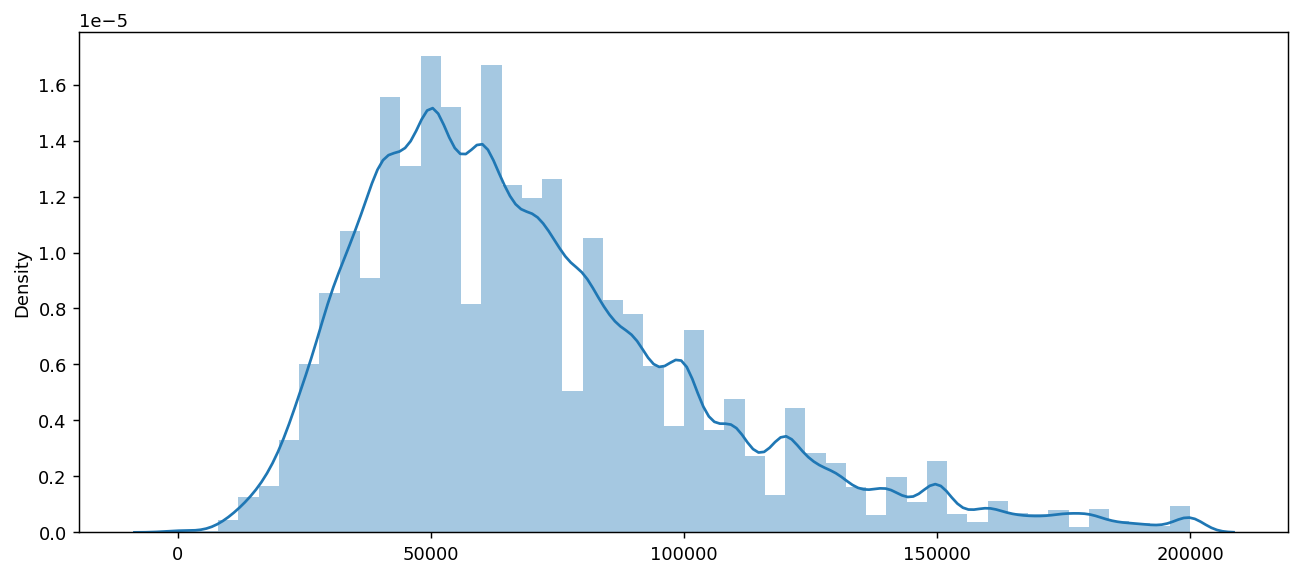

In [289]:
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=df['annual_inc']);

It is still a bit skewed but exceedingly better than before.

Lets check the distributions of annual income of customers who fully paid the loan whose loan was charged off.

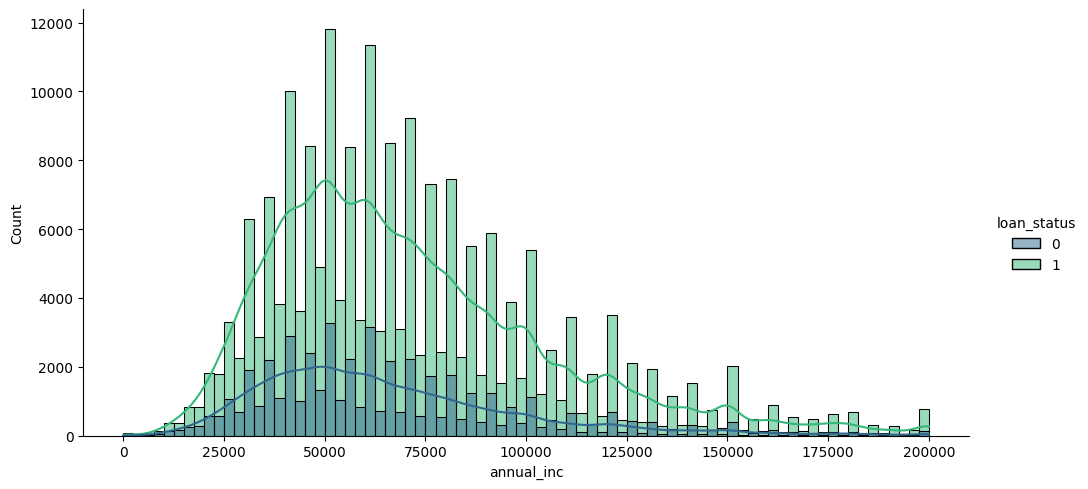

In [292]:
sns.displot(data=df, x='annual_inc', hue='loan_status', bins=80, height=5, aspect=2, kde=True, palette='viridis');

In [293]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,50341.0,65577.905086,32395.323335,0.0,42000.0,60000.0,80000.0,200000.0
1,201018.0,70976.930180,34648.174660,0.0,45000.0,65000.0,90000.0,200000.0


The mean annual_inc for customers who fully paid the loan and who did not differs by around $5000.

## 4.3 earliest_cr_line
<a id="4.3"></a>

The month the borrower's earliest reported credit line was opened.

In [294]:
if_null_values('earliest_cr_line')

'No missing values'

In [295]:
df['earliest_cr_line'].head()

0    1997
1    2007
2    1995
4    2006
5    2004
Name: earliest_cr_line, dtype: int64

Lets remove the month and just keep the year as integer.

In [296]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

TypeError: ignored

Lets check if that worked.

In [52]:
df['earliest_cr_line'].head()

0    1997
1    2007
2    1995
4    2006
5    2004
Name: earliest_cr_line, dtype: int64

Check distribution of earliest_cr_line of customers who Fully Paid the loan and customers who did not.

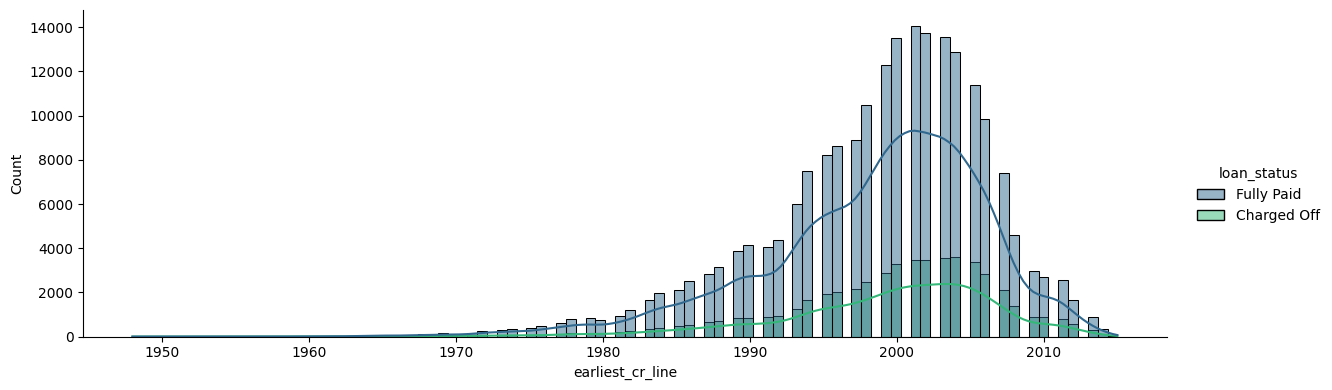

In [53]:
sns.displot(data=df, x='earliest_cr_line', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [297]:
df.groupby('loan_status')['earliest_cr_line'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,50341.0,1999.498937,7.529802,1951.0,1996.0,2001.0,2005.0,2015.0
1,201018.0,1998.781258,7.510683,1948.0,1995.0,2000.0,2004.0,2015.0


Mean earliest_cr_line for customers who fully paid the loan was approx. 1 year before the customers who did not pay the loan.

## 4.4 emp_length
<a id="4.4"></a>

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [298]:
if_null_values('emp_length')

'% of missing values = 5.89'

In [56]:
df['emp_length'].head()

0       1 year
1       1 year
2    10+ years
4      2 years
5      4 years
Name: emp_length, dtype: object

Create an ascending order list

In [57]:
emp_length_order = [ '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

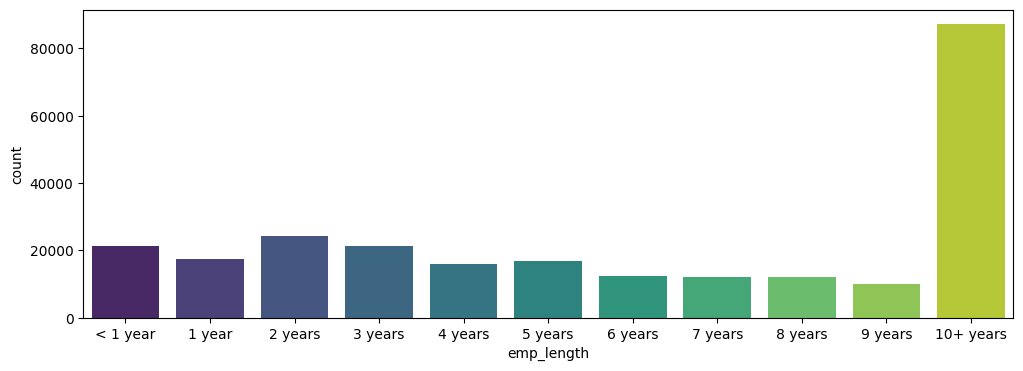

In [58]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order, palette='viridis')

<Axes: xlabel='emp_length', ylabel='count'>

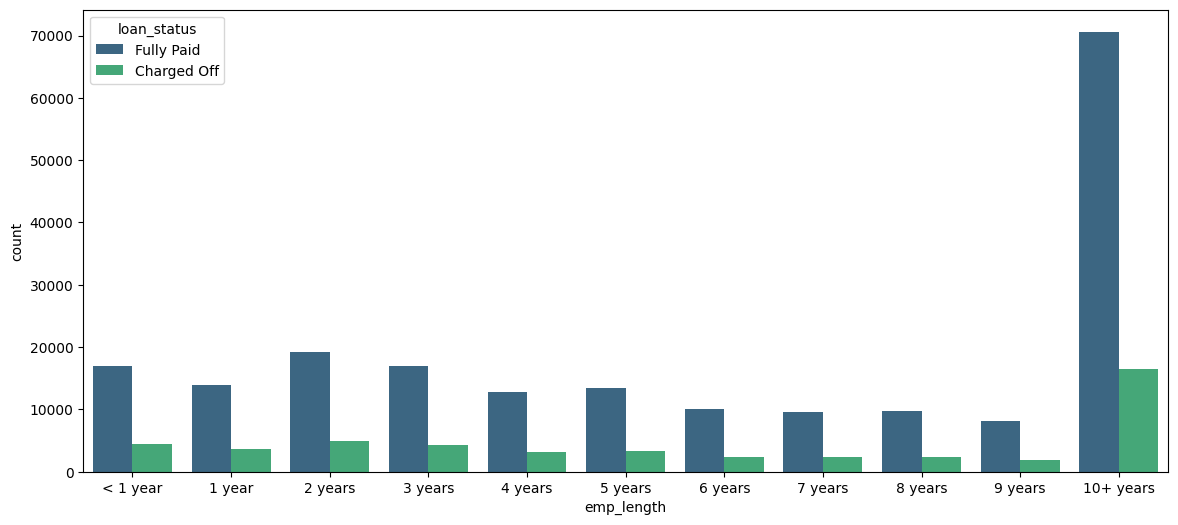

In [59]:
plt.figure(figsize=(14,6))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status', palette='viridis')

This is still not indicating if there's any relationship between emp_length and being charged off. Let us find % of charged off customers per year.

In [60]:
emp_charged_off = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fully_paid = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
percentage_charged_off = (emp_charged_off * 100)/(emp_charged_off + emp_fully_paid)
percentage_charged_off

emp_length
1 year       20.313842
10+ years    18.974318
2 years      20.239774
3 years      20.005671
4 years      19.787475
5 years      19.602085
6 years      18.866246
7 years      19.825781
8 years      19.733998
9 years      19.058072
< 1 year     20.700295
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

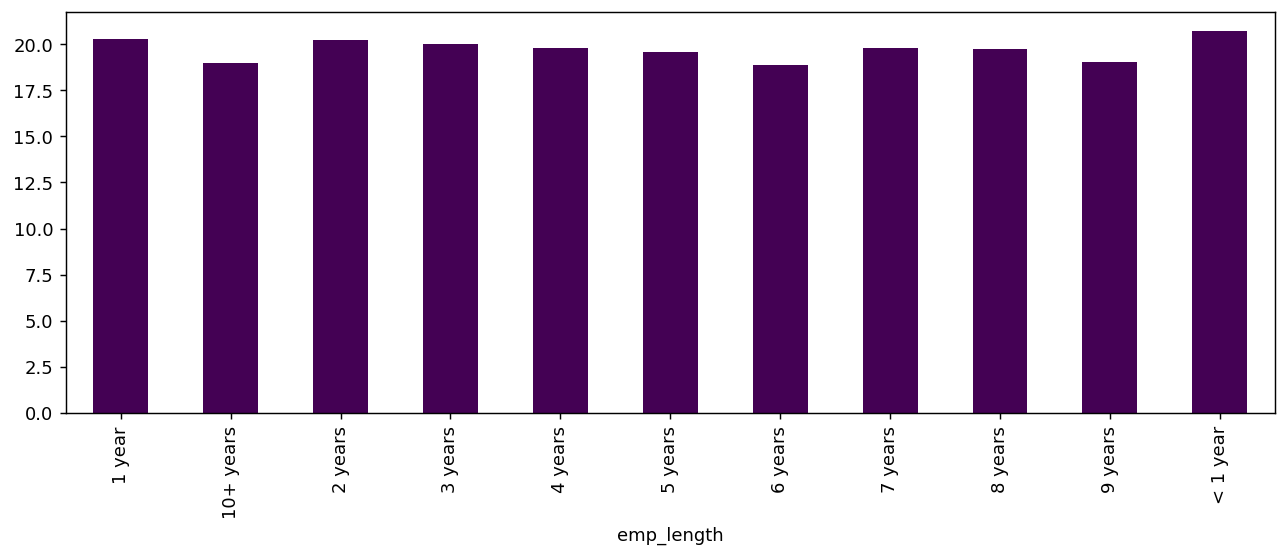

In [61]:
plt.figure(figsize=(12,4), dpi=130)
percentage_charged_off.plot(kind='bar', cmap='viridis')

There is not much differnce. This feature won't make much differnece in our training and predictions. Hence, its better to drop this feature.

In [62]:
df = df.drop('emp_length', axis=1)

In [63]:
df.columns

Index(['annual_inc', 'earliest_cr_line', 'emp_title', 'fico_range_high',
       'fico_range_low', 'grade', 'home_ownership', 'application_type',
       'initial_list_status', 'int_rate', 'loan_amnt', 'num_actv_bc_tl',
       'loan_status', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'AL',
       'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS',
       'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
       'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
       'WY'],
      dtype='object')

In [64]:
df.shape

(266033, 76)

## 4.5 emp_title
<a id="4.5"></a>

The job title supplied by the Borrower when applying for the loan.

In [65]:
if_null_values('emp_title')

'% of missing values = 6.43'

In [66]:
df['emp_title'].describe()

count      248827
unique     100791
top       Teacher
freq         4285
Name: emp_title, dtype: object

There are 378007 unique values, way too many to create dummies. Hence, it is wise to drop this feature.

In [67]:
df = df.drop('emp_title', axis=1)

## 4.6 fico_range_high and fico_range_low
<a id="4.6"></a>

In [ ]:
df['fico_range_high'].describe()

In [69]:
df['fico_range_low'].describe()

count    266033.000000
mean        696.020343
std          31.791870
min         660.000000
25%         670.000000
50%         690.000000
75%         710.000000
max         845.000000
Name: fico_range_low, dtype: float64

Both fico_range_high and fico_range_low have similar mean and standard deviation. So, we will use mean of both scores.

In [70]:
df['fico'] = (df['fico_range_high'] + df['fico_range_low']) / 2
df['fico']

0         682.0
1         697.0
2         732.0
4         687.0
5         667.0
          ...  
452132    702.0
452134    672.0
452136    762.0
452137    692.0
452138    682.0
Name: fico, Length: 266033, dtype: float64

Lets drop the original columns.

In [71]:
df = df.drop(['fico_range_high', 'fico_range_low'], axis=1)

In [72]:
df.shape

(266033, 74)

Let's check the distribution now.

<Axes: ylabel='Density'>

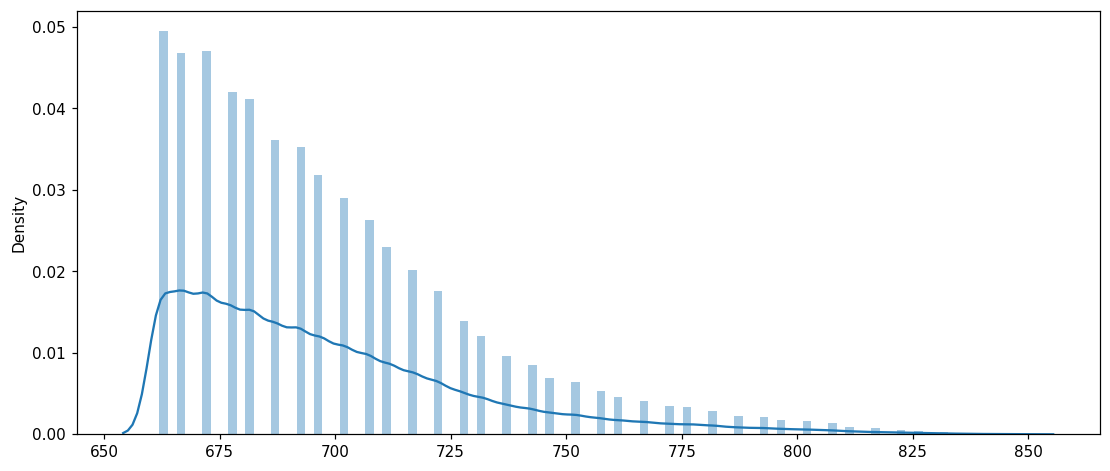

In [73]:
plt.figure(figsize=(12,5), dpi=110)
sns.distplot(x=df['fico'], bins=100)

Check distribution of fico score of customers who Fully Paid the loan and customers who did not.

<Figure size 6000x2100 with 0 Axes>

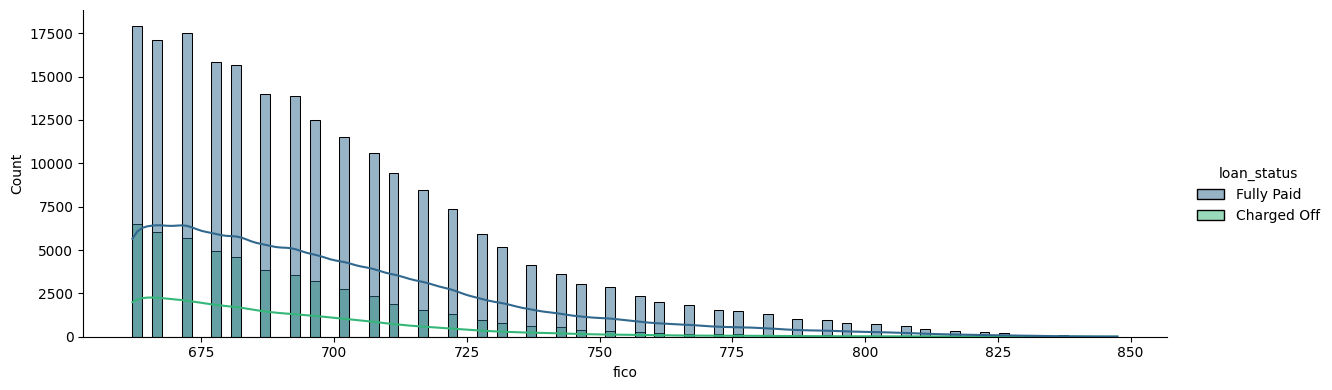

In [74]:
plt.figure(figsize=(20,7), dpi=300)
sns.displot(data=df, x='fico', hue='loan_status', bins=100, height=4, aspect=3, kde=True, palette='viridis')

<Axes: xlabel='fico', ylabel='loan_status'>

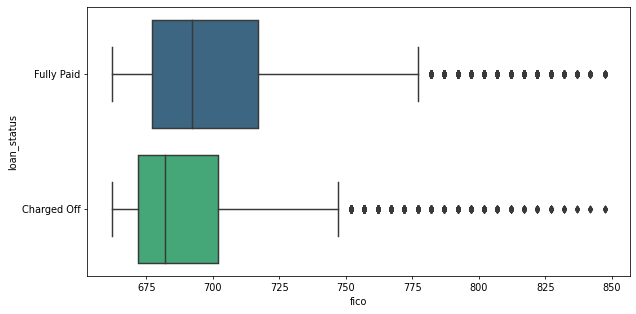

In [75]:
plt.figure(figsize=(10,5), dpi=70)
sns.boxplot(data=df, y='loan_status', x='fico', palette='viridis')

Fico has data distriubtion with long right tail and there are many exterment values can be considred to remove

In [305]:
(df.fico>775).sum()/len(df)

0.034472606908843524

In [307]:
df=df[df.fico<775]

Only .03 values are above 775, these can be dropped fromd data

In [308]:
df.groupby('loan_status')['fico'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,49656.0,688.643910,23.276545,662.0,672.0,682.0,702.0,772.0
1,193038.0,696.237559,26.914813,662.0,672.0,692.0,712.0,772.0


There is a differnce between fico scores of customers who Fully paid loan and wh did not.

## 4.7 grade and sub_grade
<a id="4.7"></a>

LC assigned loan grade and sub grade.

Let's check unique grade and sub_grade categories.

In [77]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [78]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

Check number of cutomers separated by grade and based on their loan_status.

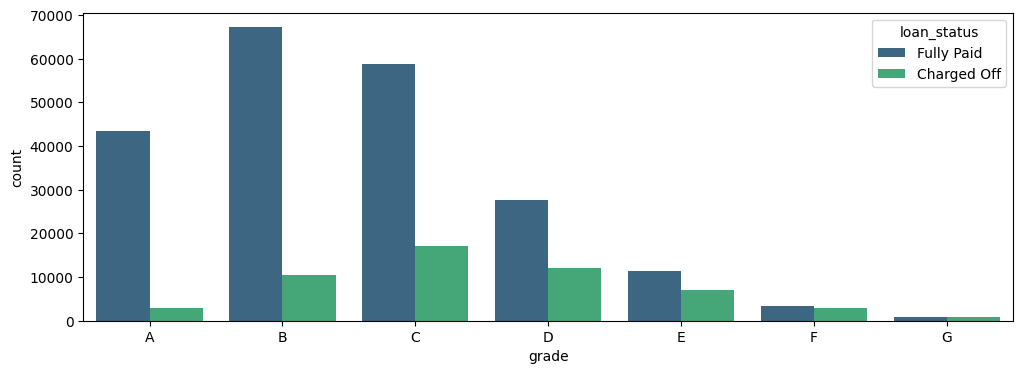

In [79]:
plt.figure(figsize=(12,4))
sns.countplot(x='grade',data=df,hue='loan_status', order=sorted(df['grade'].unique()), palette='viridis');

Check number of customers in each sub_grade.

<Axes: xlabel='sub_grade', ylabel='count'>

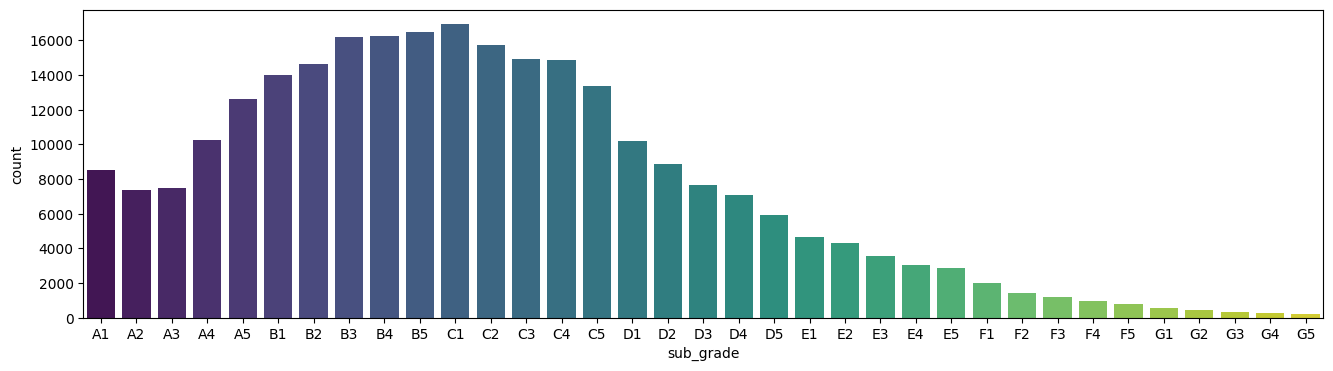

In [80]:
plt.figure(figsize=(16,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='viridis')

Check number of customers in each sub_grade separated by loan_status

<Axes: xlabel='sub_grade', ylabel='count'>

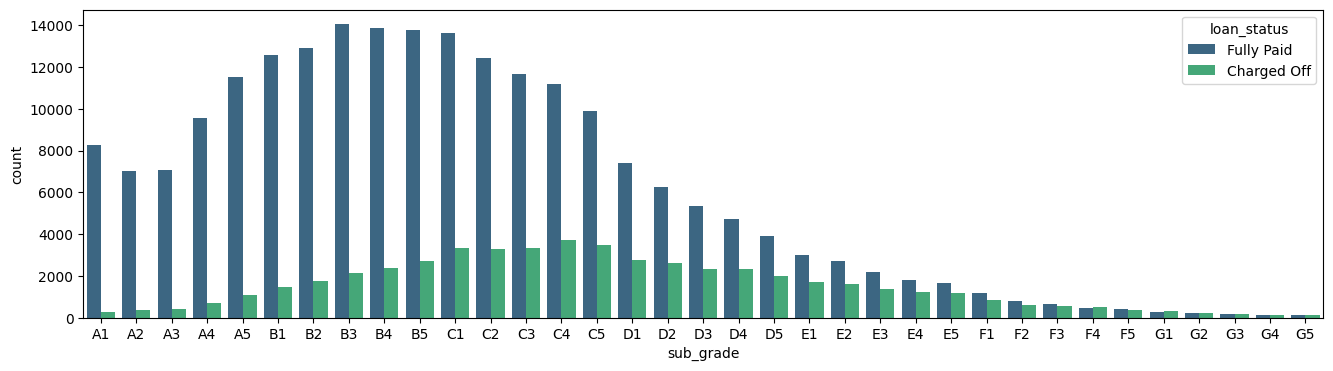

In [81]:
plt.figure(figsize=(16,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='viridis' ,hue='loan_status')

Customers who don't pay back loan have higher grade.<br>
Information of 'grade' is already embedded in 'sub_grade'.<br>
Let's drop 'grade' feature.

In [82]:
df = df.drop('grade', axis=1)

As sub_grade is categorical, lets create dummies for the same.

In [83]:
dummies_sub_grade = pd.get_dummies(df['sub_grade'], drop_first=True)

Concat the 'dummies_sub_grade' after dropping the original feature 'sub_grade'.

In [84]:
df = pd.concat([df.drop('sub_grade', axis=1), dummies_sub_grade], axis=1)

In [85]:
df.shape

(266033, 106)

## 4.8 home_ownership
<a id="4.8"></a>

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [86]:
if_null_values('home_ownership')

'No missing values'

In [87]:
df['home_ownership'].value_counts()

MORTGAGE    131342
RENT        105879
OWN          28714
ANY             60
OTHER           28
NONE            10
Name: home_ownership, dtype: int64

Let's merge 'ANY' and 'NONE' into 'OTHER'.

In [88]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

<Axes: xlabel='home_ownership', ylabel='count'>

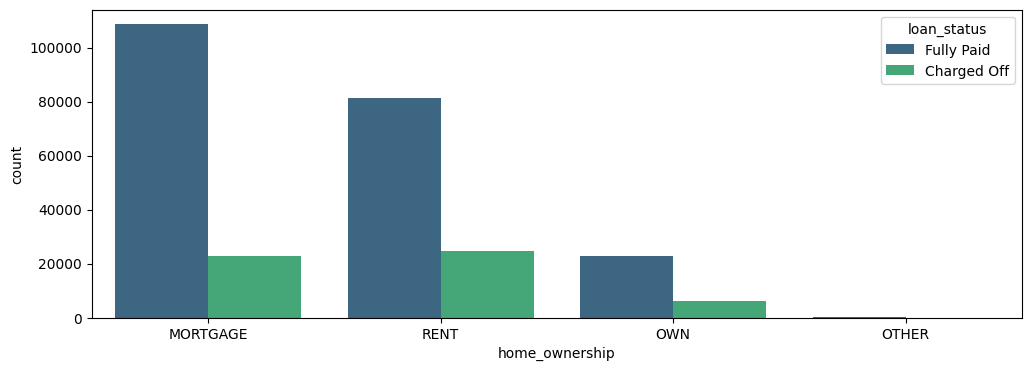

In [89]:
plt.figure(figsize=(12,4))
sns.countplot(x='home_ownership',data=df,hue='loan_status', palette='viridis')

In [90]:
df['home_ownership'].value_counts()

MORTGAGE    131342
RENT        105879
OWN          28714
OTHER           98
Name: home_ownership, dtype: int64

Percentage charged off per home_ownership category.

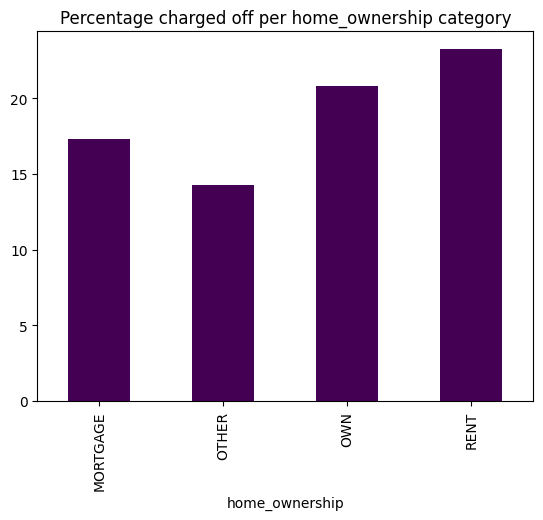

In [91]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("home_ownership").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("home_ownership").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per home_ownership category");

Visible differences between different categories of home_ownership.

Since there are only 4 categories in home_ownership column, we will convert it into dummies.

In [92]:
dummies_home_ownership = pd.get_dummies(df['home_ownership'], drop_first=True)

Concat the 'dummies_home_ownership' after dropping the original feature 'home_ownership'

In [93]:
df = pd.concat([df.drop('home_ownership', axis=1), dummies_home_ownership], axis=1)

In [94]:
df.shape

(266033, 108)

## 4.9 application_type
<a id="4.9"></a>

Indicates whether the loan is an individual application or a joint application with two co-borrowers.

In [95]:
if_null_values('application_type')

'No missing values'

In [96]:
df['application_type'].value_counts()

Individual    260930
Joint App       5103
Name: application_type, dtype: int64

Let's plot a countplot for different categories for application types, separated by loan_status.

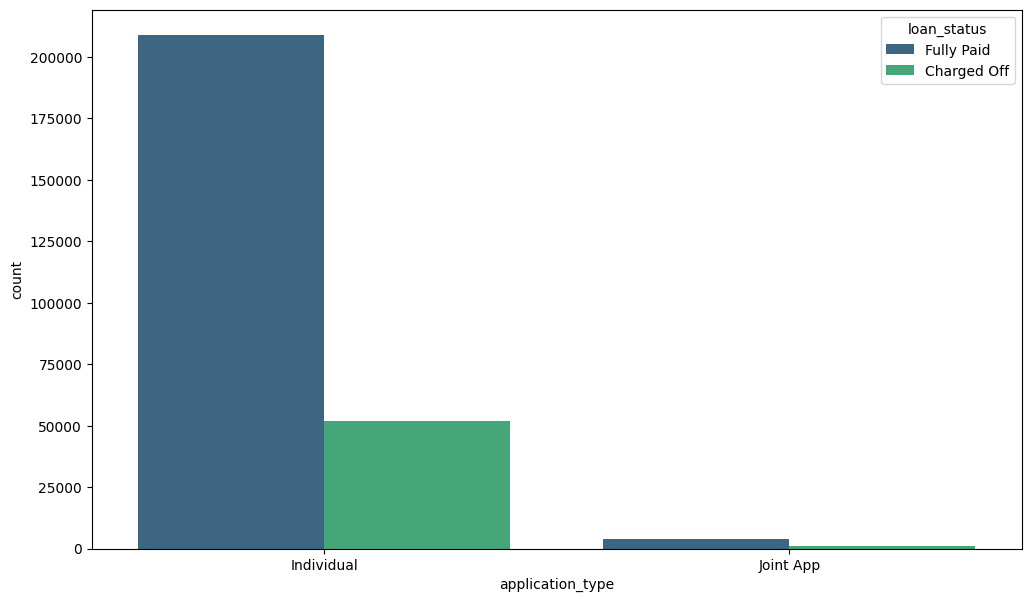

In [97]:
plt.figure(figsize=(12,7))
sns.countplot(x='application_type',data=df,hue='loan_status', palette='viridis');

Percentage charged off per application_type category.

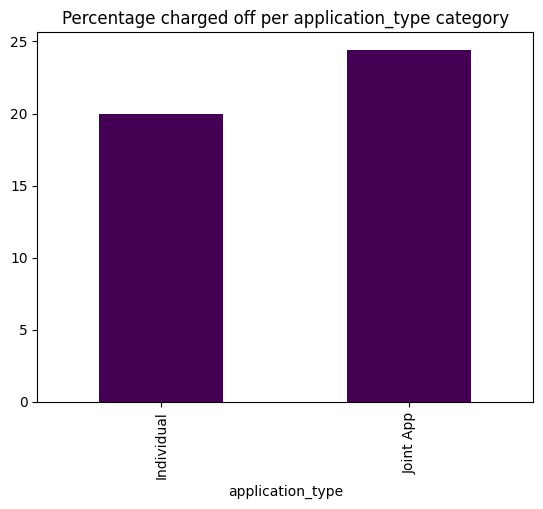

In [98]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("application_type").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("application_type").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per application_type category");

Visible differences between different categories of home_ownership.

Since, this feature is categorical, let's create dummy variables. We will also drop the original feature (application_type) and concat the newly created dummy features.

In [99]:
dummies_application_type = pd.get_dummies(df['application_type'], drop_first=True)
df = pd.concat([df.drop('application_type', axis=1), dummies_application_type], axis=1)

## 4.10 initial_list_status
<a id="4.10"></a>

The initial listing status of the loan. Possible values are – W, F.

In [100]:
if_null_values('initial_list_status')

'No missing values'

In [101]:
df['initial_list_status'].value_counts()

w    154788
f    111245
Name: initial_list_status, dtype: int64

Let's plot 'initial_list_status' for the two 'loan_status'.

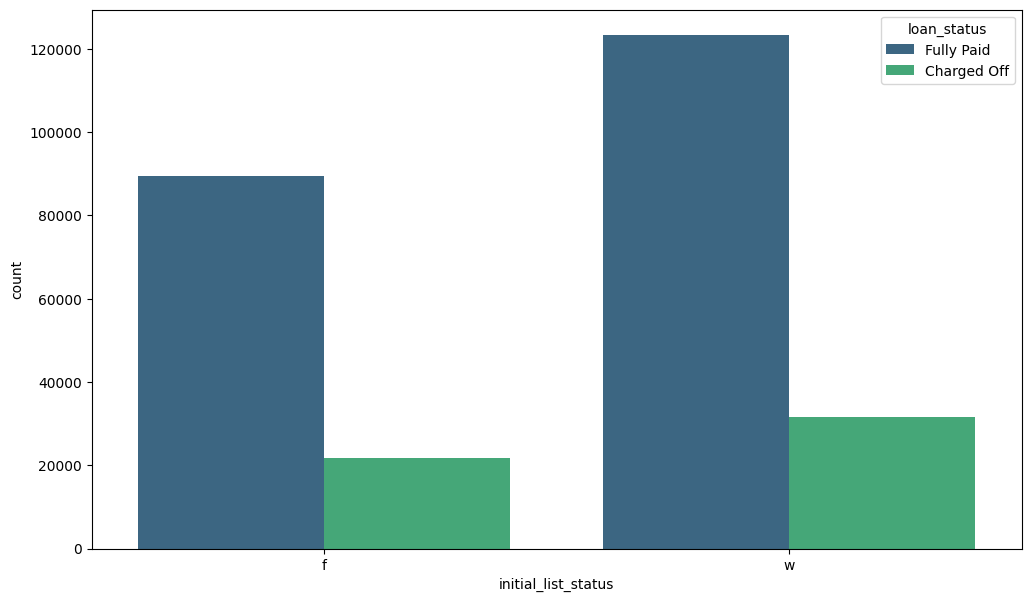

In [102]:
plt.figure(figsize=(12,7))
sns.countplot(x='initial_list_status',data=df,hue='loan_status', palette='viridis');

Percentage charged off per initial_list_status category.

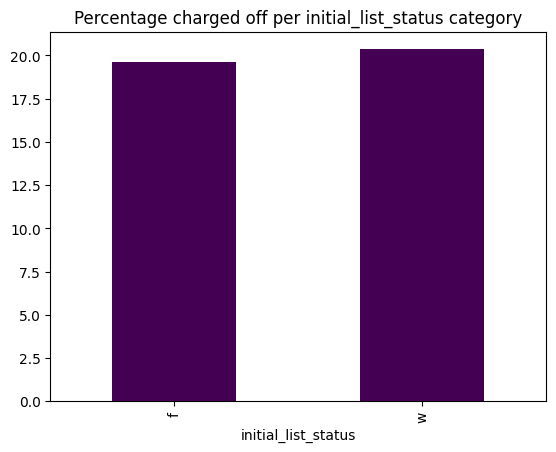

In [103]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("initial_list_status").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("initial_list_status").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per initial_list_status category");

Percentage charged off is almost same. Let's drop this feature.

In [104]:
df = df.drop('initial_list_status', axis=1)

## 4.11 int_rate
<a id="4.11"></a>

Interest Rate on the loan.

In [105]:
if_null_values('int_rate')

'No missing values'

In [106]:
df['int_rate'].describe()

count    266033.000000
mean         13.247043
std           4.762746
min           5.310000
25%           9.750000
50%          12.740000
75%          15.990000
max          30.990000
Name: int_rate, dtype: float64

In [107]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,53317.0,15.700449,4.912597,5.31,12.29,15.05,18.55,30.99
Fully Paid,212716.0,12.632100,4.520352,5.31,9.17,12.29,15.31,30.99


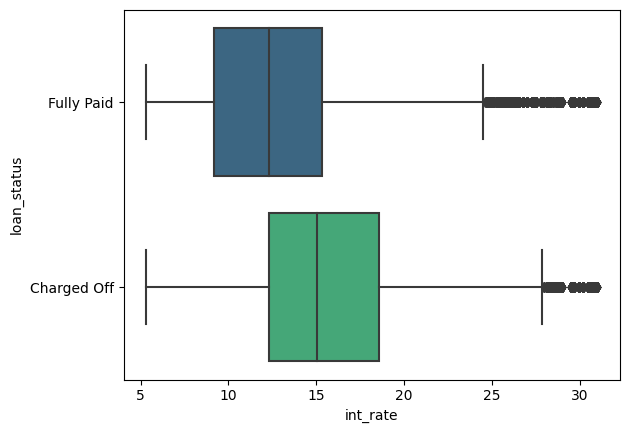

In [108]:
sns.boxplot(data=df, y='loan_status', x='int_rate', palette='viridis');

Clear difference can be seen in the mean 'int_rate' between the two 'loan_status' categories.

## 4.12 loan_amnt
<a id="4.12"></a>

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [109]:
if_null_values('loan_amnt')

'No missing values'

In [110]:
df['loan_amnt'].describe()

count    266033.000000
mean      14275.704800
std        8616.413025
min         500.000000
25%        7800.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [111]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,53317.0,15476.559540,8721.689714,1000.0,9000.0,14150.0,20000.0,40000.0
Fully Paid,212716.0,13974.712057,8563.490694,500.0,7350.0,12000.0,20000.0,40000.0


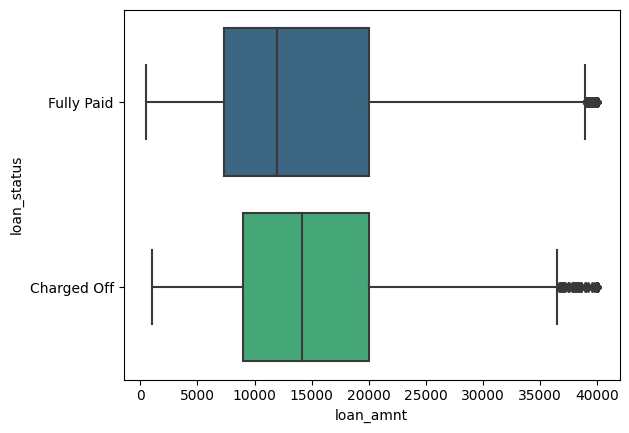

In [112]:
sns.boxplot(data=df, y='loan_status', x='loan_amnt', palette='viridis');

Clear difference can be seen in the mean 'loan_amnt' between the two 'loan_status' categories.

## 4.13 num_actv_bc_tl
<a id="4.13"></a>

Number of currently active bankcard accounts.

In [113]:
if_null_values('num_actv_bc_tl')

'% of missing values = 5.07'

In [114]:
df['num_actv_bc_tl'].describe()

count    252486.000000
mean          3.634732
std           2.243589
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          33.000000
Name: num_actv_bc_tl, dtype: float64

Range of num_actv_bc_tl is from 0 to 35 with mean at 3.64 and mojority of values between 2 to 5. Lets fill the missing values with the integer value closest to mean, i.e., 4.

In [115]:
df['num_actv_bc_tl'] = df['num_actv_bc_tl'].fillna(4)

In [116]:
df['num_actv_bc_tl'].isnull().sum()

0

In [117]:
df.groupby('loan_status')['num_actv_bc_tl'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,53317.0,3.824315,2.311006,0.0,2.0,3.0,5.0,30.0
Fully Paid,212716.0,3.610476,2.152923,0.0,2.0,3.0,5.0,33.0


Since there are some outliers, we will drop rows with customers with 'num_actv_bc_tl' > 9.

In [118]:
df = df[df['num_actv_bc_tl'] < 10]

In [119]:
df.groupby('loan_status')['num_actv_bc_tl'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51966.0,3.621541,1.932259,0.0,2.0,3.0,5.0,9.0
Fully Paid,208900.0,3.464519,1.855087,0.0,2.0,3.0,4.0,9.0


<Axes: xlabel='num_actv_bc_tl', ylabel='loan_status'>

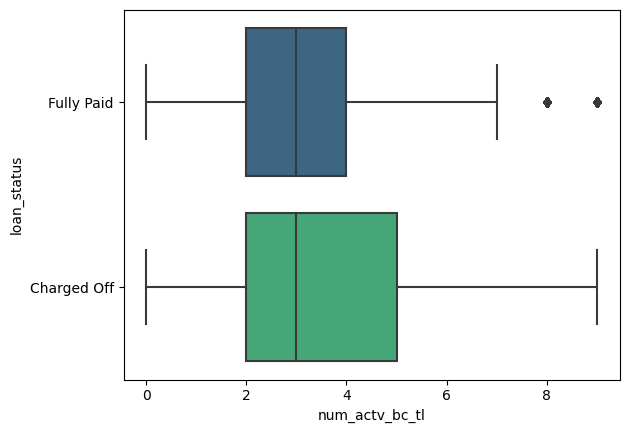

In [120]:
sns.boxplot(data=df, y='loan_status', x='num_actv_bc_tl', palette='viridis')

Minute difference can be seen in the mean 'num_actv_bc_tl' between the two 'loan_status' categories. We will go ahead and keep this feature.

## 4.14 mort_acc
<a id="4.14"></a>

Number of mortgage accounts.

In [121]:
if_null_values('mort_acc')

'% of missing values = 3.54'

In [122]:
df['mort_acc'].describe()

count    251407.000000
mean          1.652337
std           1.983249
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          37.000000
Name: mort_acc, dtype: float64

Range of mort_acc is from 0 to 51 with mean at 1.66

In [123]:
df.corr()['num_actv_bc_tl'].sort_values()[:-1]

earliest_cr_line       -0.105580
fico                   -0.104318
pub_rec_bankruptcies   -0.058308
pub_rec                -0.035789
Joint App              -0.034925
                          ...   
annual_inc              0.145590
loan_amnt               0.178158
total_acc               0.228768
revol_bal               0.296796
open_acc                0.456811
Name: num_actv_bc_tl, Length: 101, dtype: float64

'num_actv_bc_tl' and 'open_acc' are closely related. Let's fill missing 'mort_acc' by the mode of corresponding value in 'num_actv_bc_tl'.

In [327]:
df.mort_acc.value_counts()

0.0    106740
1.0     41543
2.0     33750
3.0     24518
4.0     16583
5.0      9750
6.0      5576
7.0      2883
8.0      1351
Name: mort_acc, dtype: int64

In [124]:
df['mort_acc'] = df['mort_acc'].fillna(df.groupby('open_acc')['mort_acc'].transform(lambda x:x.value_counts().index[0]))

In [125]:
df['mort_acc'].isnull().sum()

0

In [126]:
df.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51966.0,1.322903,1.787777,0.0,0.0,1.0,2.0,27.0
Fully Paid,208900.0,1.659469,2.008766,0.0,0.0,1.0,3.0,37.0


Since there are some outliers, we will drop rows with customers with mort_acc > 8.

In [127]:
df = df[df['mort_acc'] < 9]

In [128]:
df.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51755.0,1.286484,1.692563,0.0,0.0,1.0,2.0,8.0
Fully Paid,207393.0,1.595849,1.859751,0.0,0.0,1.0,3.0,8.0


<Axes: xlabel='mort_acc', ylabel='loan_status'>

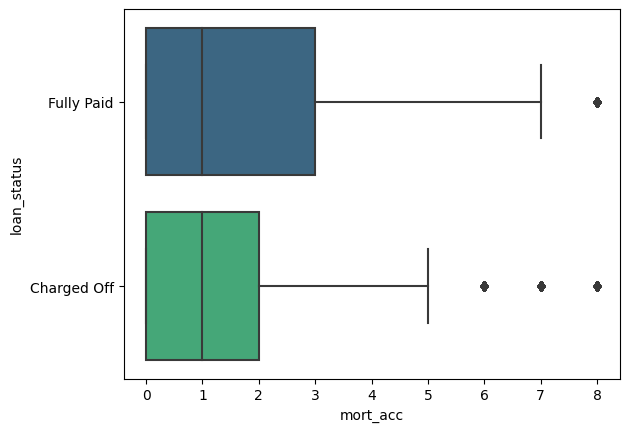

In [129]:
sns.boxplot(data=df, y='loan_status', x='mort_acc', palette='viridis')

Minute difference can be seen in the mean 'mort_acc' between the two 'loan_status' categories. We will go ahead and keep this feature.

## 4.15 total_acc
<a id="4.15"></a>

The total number of credit lines currently in the borrower's credit file.

In [130]:
if_null_values('total_acc')

'No missing values'

In [131]:
df['total_acc'].describe()

count    259148.000000
mean         24.572283
std          11.742711
min           2.000000
25%          16.000000
50%          23.000000
75%          31.000000
max         144.000000
Name: total_acc, dtype: float64

Let's make a countplot of number of customers with different 'total_acc'.

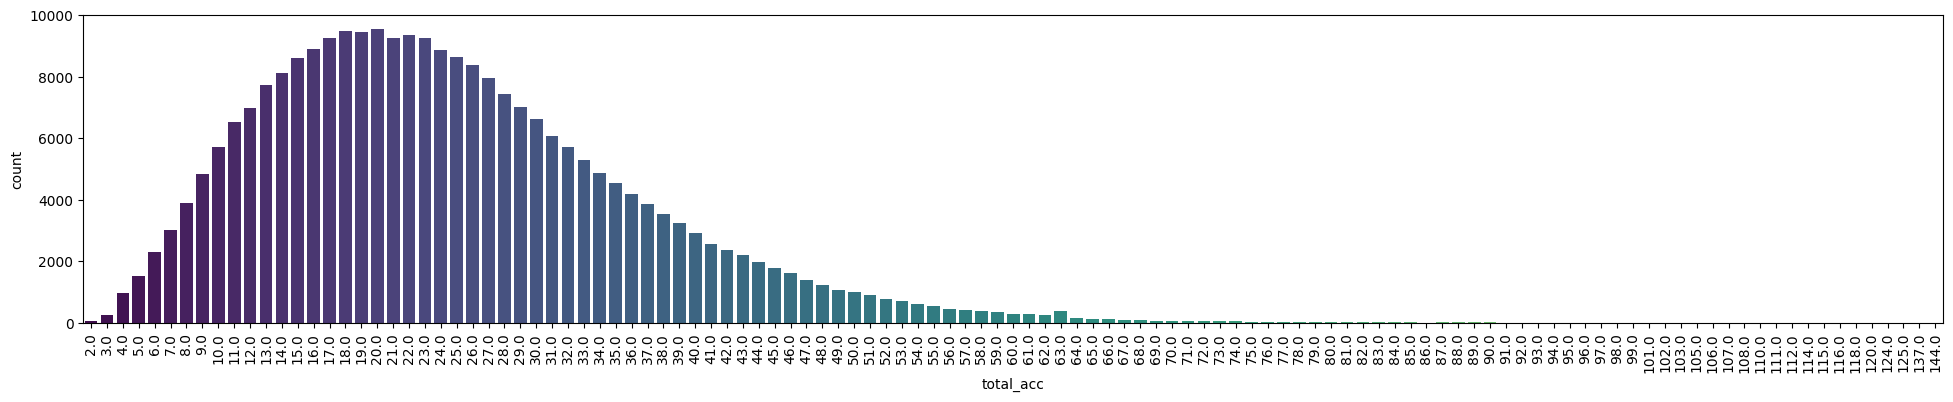

In [132]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', palette='viridis');

Since there are some outliers, we will drop rows with customers with 'total_acc' > 63.

In [133]:
df = df[df['total_acc'] < 64]

In [134]:
df.shape

(257818, 107)

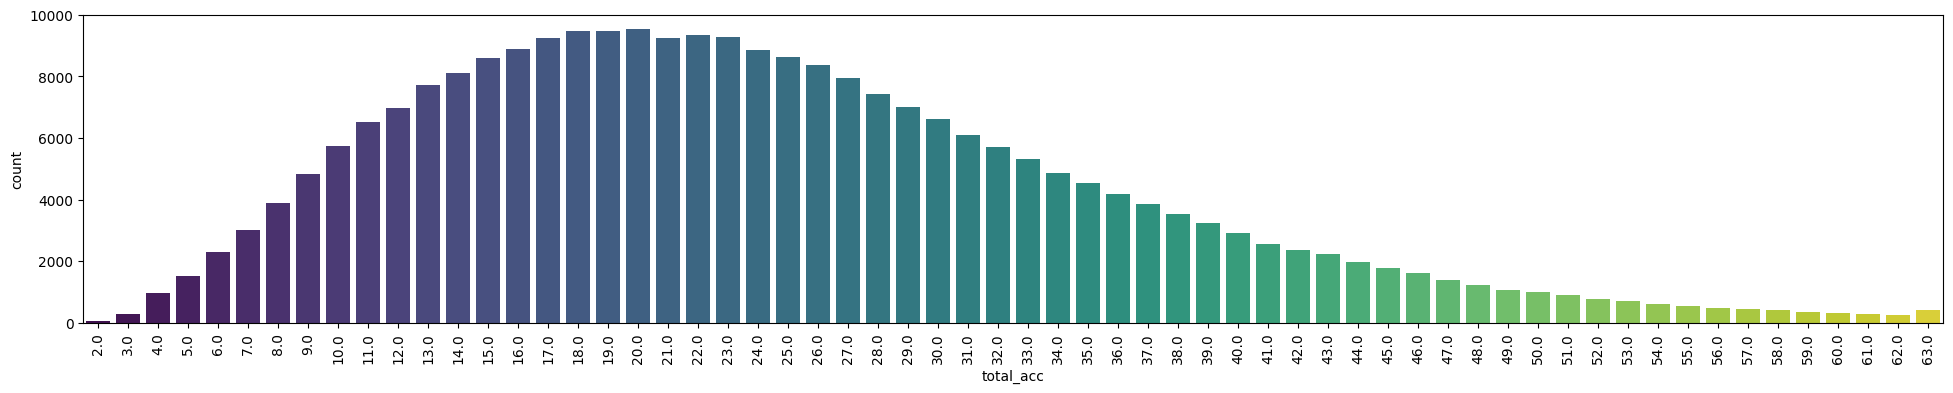

In [135]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', palette='viridis');

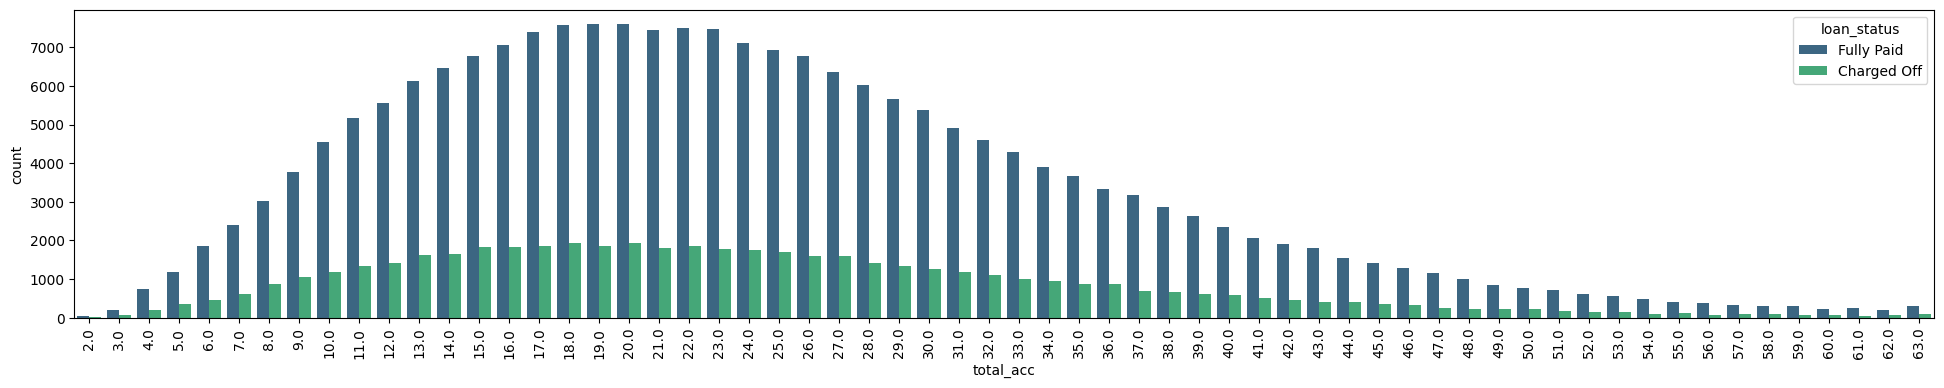

In [136]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', hue='loan_status', palette='viridis');

In [137]:
df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51455.0,24.092158,11.313943,2.0,16.0,22.0,31.0,63.0
Fully Paid,206363.0,24.381784,11.206688,2.0,16.0,23.0,31.0,63.0


Difference can be seen in the mean 'total_acc' between the two 'loan_status' categories. We will go ahead and keep this feature.

## 4.16 tot_cur_bal
<a id="4.16"></a>

Total current balance of all accounts.

In [138]:
if_null_values('tot_cur_bal')

'% of missing values = 5.07'

In [139]:
df['tot_cur_bal'].describe()

count    2.443230e+05
mean     1.337542e+05
std      1.413061e+05
min      0.000000e+00
25%      2.867900e+04
50%      7.622600e+04
75%      2.034090e+05
max      2.302431e+06
Name: tot_cur_bal, dtype: float64

Let's fill null values with mean.

In [140]:
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].describe()['mean'])

In [141]:
df['tot_cur_bal'].isnull().sum()

0

Let's plot the distribution of 'tot_cur_bal' of the customers.

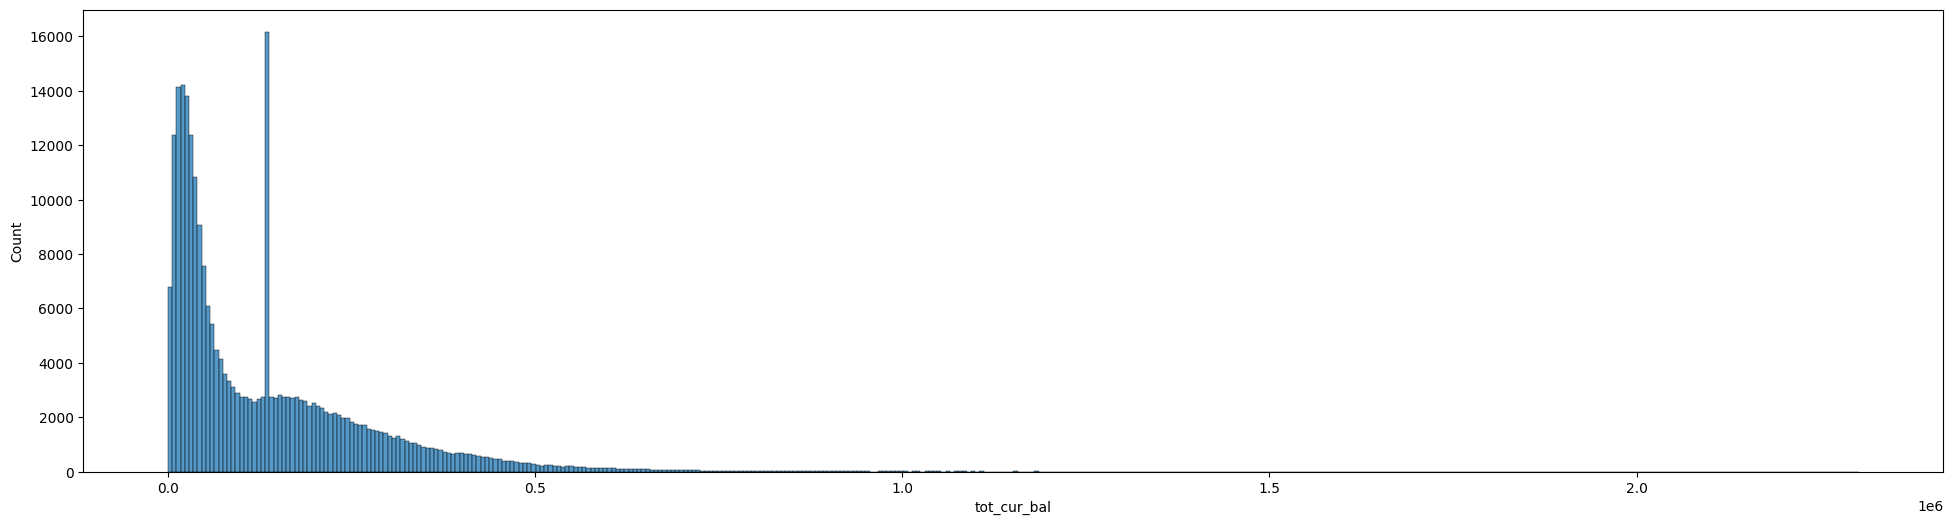

In [142]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='tot_cur_bal', bins=400, palette='viridis');

Since there are some outliers, we will drop rows with customers with 'tot_cur_bal' > $1000000.

In [143]:
df = df[df['tot_cur_bal'] < 1000001]

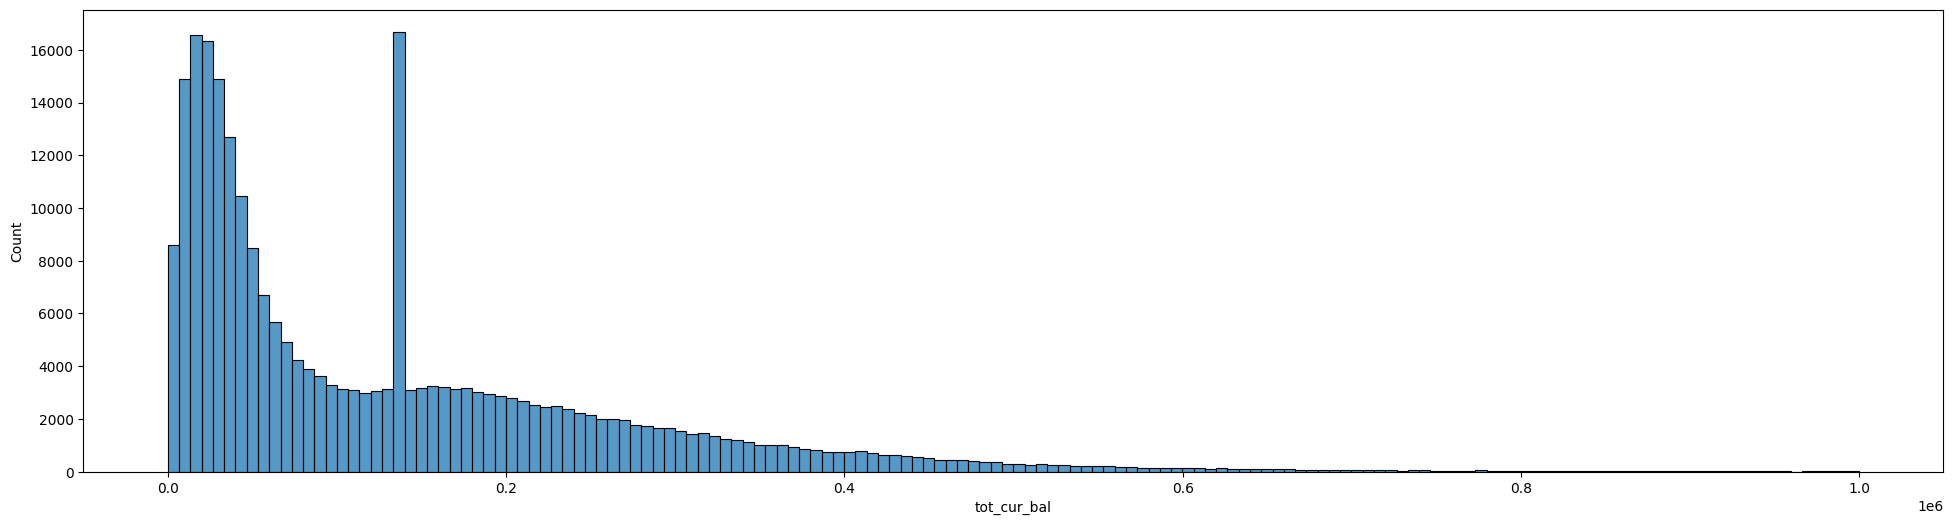

In [144]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='tot_cur_bal', bins=150, palette='viridis');

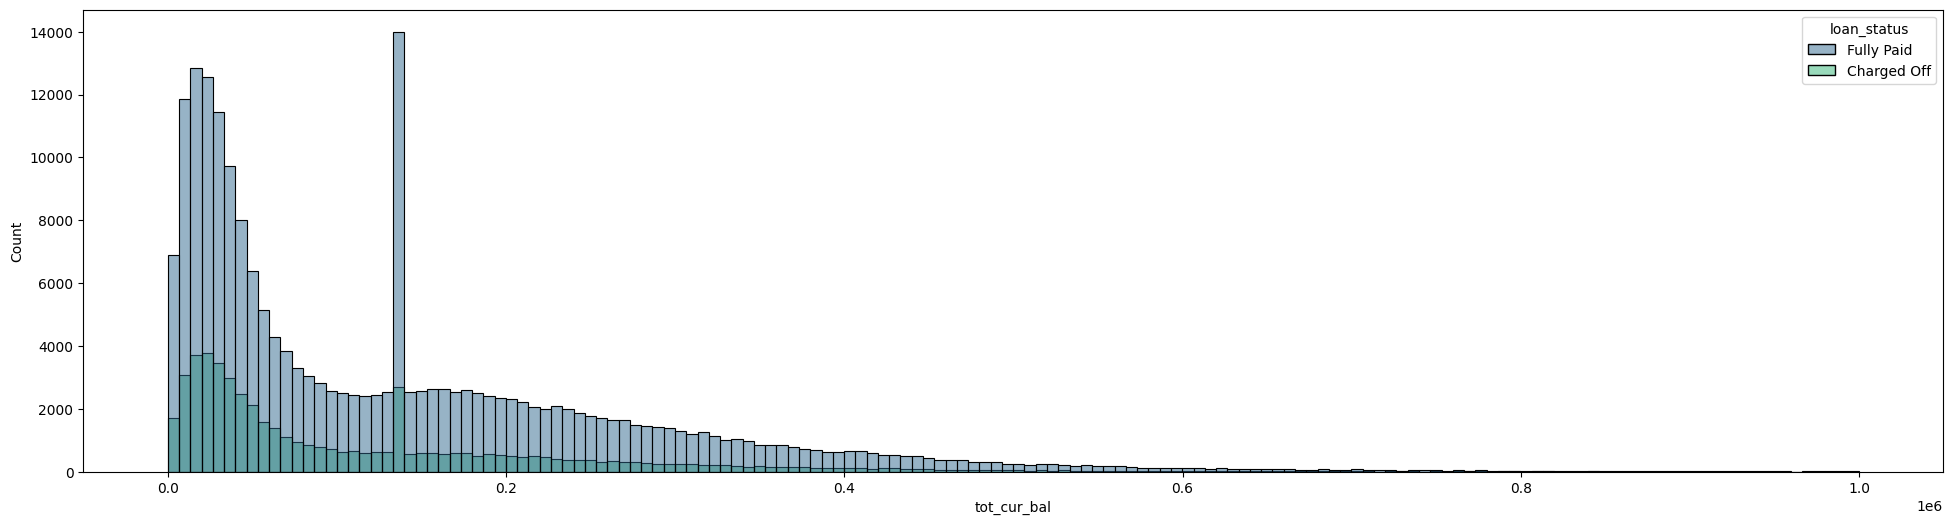

In [145]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='tot_cur_bal', bins=150, hue='loan_status', palette='viridis');

In [146]:
df.groupby('loan_status')['tot_cur_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51442.0,114479.465673,120586.786623,0.0,27851.0,63991.0,164810.25,989672.0
Fully Paid,206185.0,137599.389608,137428.864266,0.0,30854.0,95854.0,202597.00,999670.0


Mean 'tot_cur_bal' is higher in case of customers who fully paid the loan.

## 4.17 open_acc
<a id="4.17"></a>

The number of open credit lines in the borrower's credit file.

In [147]:
if_null_values('open_acc')

'No missing values'

Let's plot the distribution of 'open_acc' of customers.

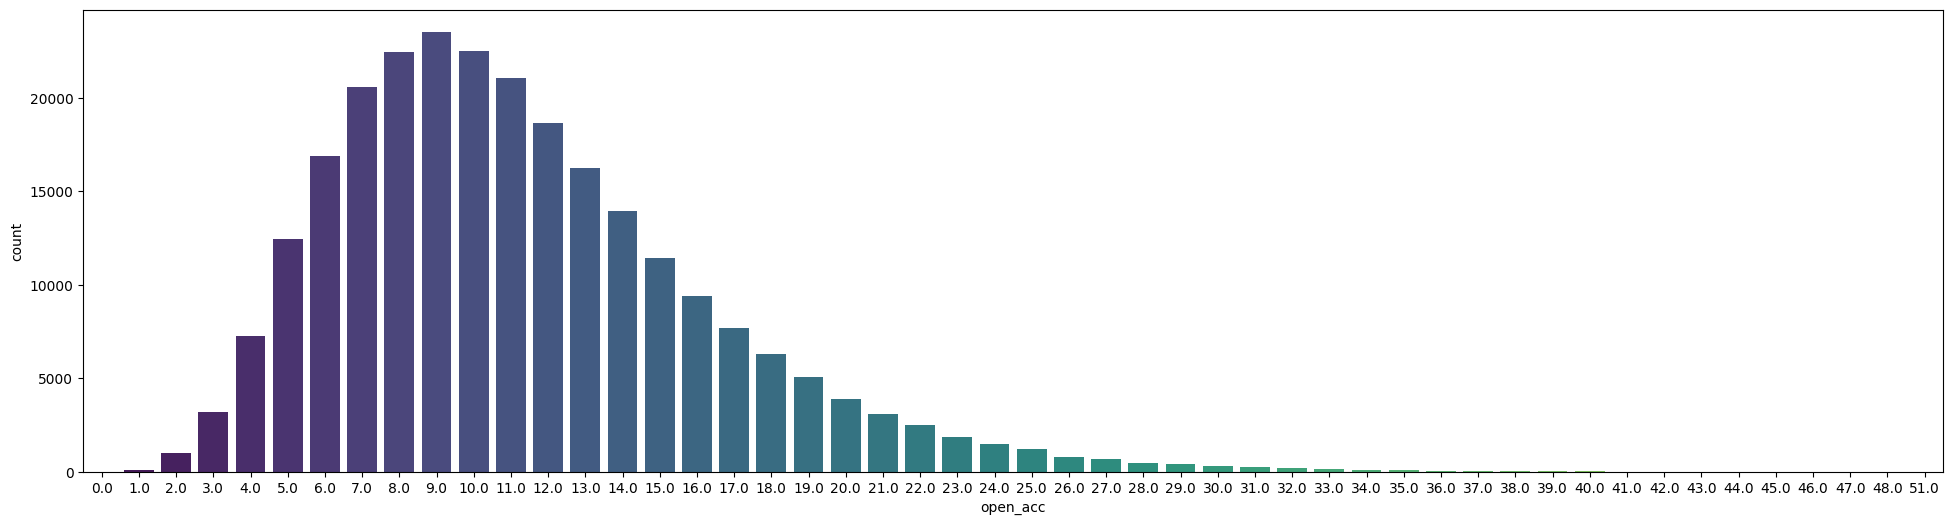

In [148]:
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='open_acc', palette='viridis');

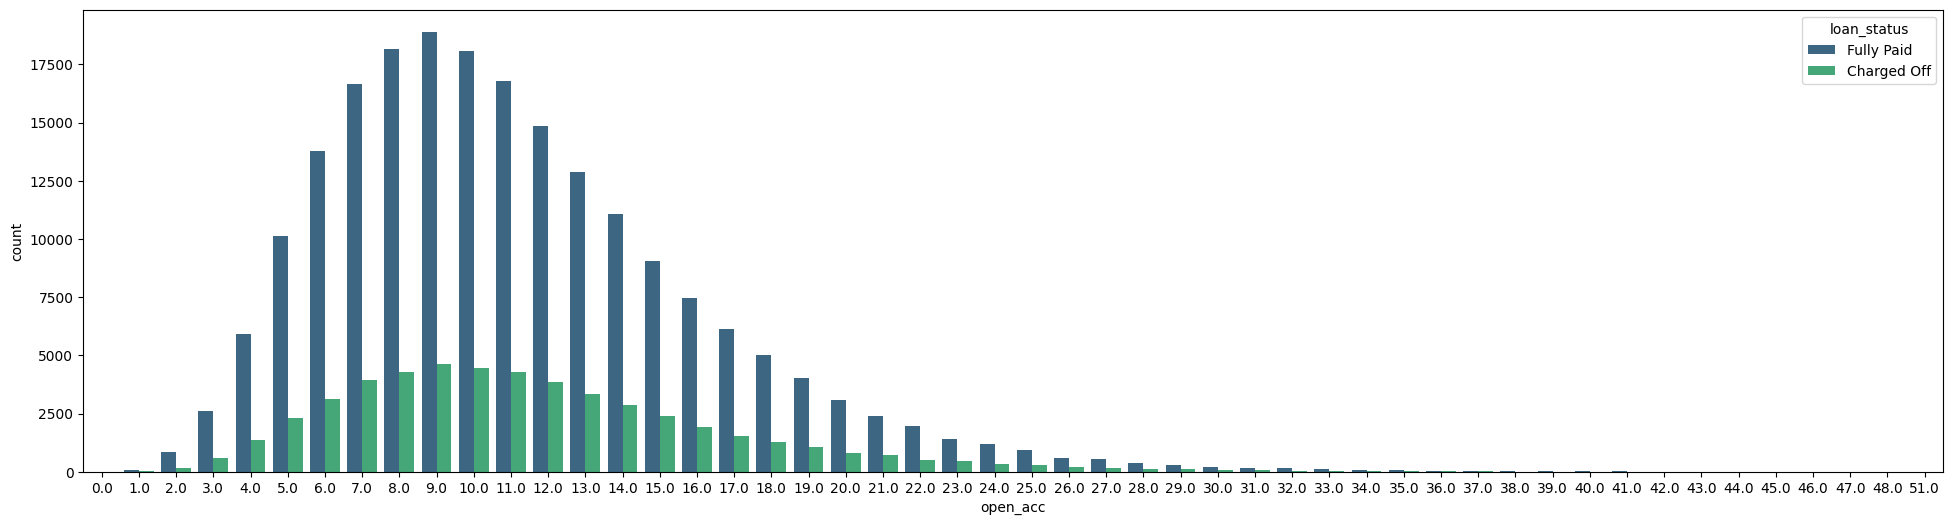

In [149]:
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='open_acc', hue='loan_status', palette='viridis');

In [150]:
df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,51442.0,11.518526,5.194143,1.0,8.0,11.0,14.0,44.0
Fully Paid,206185.0,11.206708,5.031934,0.0,8.0,10.0,14.0,51.0


Minute difference can be seen in the mean 'open_acc' between the two 'loan_status' categories. We will go ahead and keep this feature.

## 4.18 pub_rec
<a id="4.18"></a>

Number of derogatory public records.

In [151]:
if_null_values('pub_rec')

'No missing values'

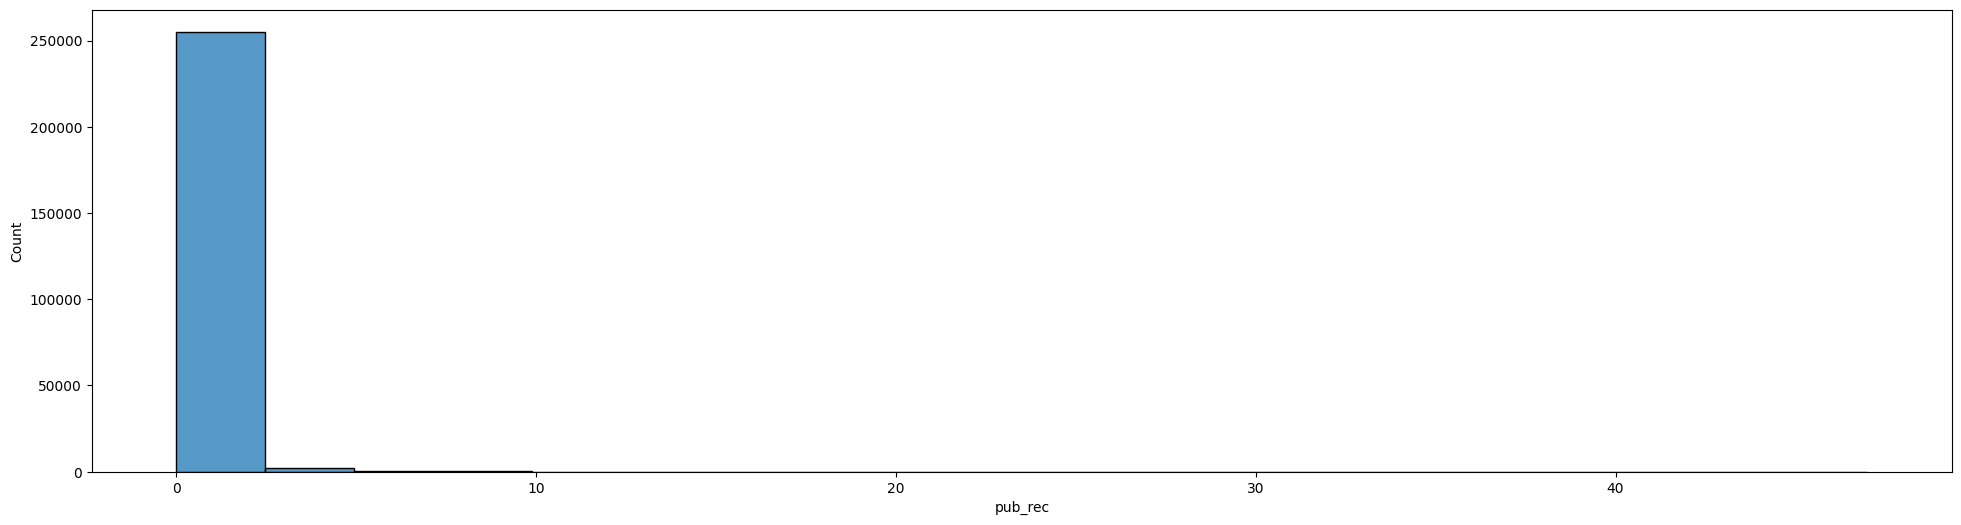

In [152]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='pub_rec', palette='viridis');

There are some outliers. Let's drop the rows with customers who have 'pub_rec > 2.

In [153]:
len(df[df['pub_rec'] > 2])*100/len(df)

0.9393425378551161

In [154]:
df = df[df['pub_rec'] < 3]

In [155]:
df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50882.0,0.207480,0.455237,0.0,0.0,0.0,0.0,2.0
Fully Paid,204325.0,0.175338,0.423063,0.0,0.0,0.0,0.0,2.0


Minute difference can be seen in the mean 'pub_rec' between the two 'loan_status' categories. We will go ahead and keep this feature.

## 4.19 pub_rec_bankruptcies
<a id="4.19"></a>

Number of public record bankruptcies.

In [156]:
if_null_values('pub_rec_bankruptcies')

'% of missing values = 0.05'

Let's calculate the correlation of 'pub_rec_bankruptcies' with other continuous features.

In [157]:
abs(df.corr()['pub_rec_bankruptcies']).sort_values(ascending=False)[1:5]

pub_rec        0.806221
fico           0.208643
revol_bal      0.130300
tot_cur_bal    0.096132
Name: pub_rec_bankruptcies, dtype: float64

Let's fill na values with mode of corresponding annual_inc values.

We will create a function to categorise 'annual_inc' in 5 categories and based on these categories, we will fill in the missing values of 'pub_rec_bankruptcies' by a group_by call.

In [158]:
def inc_cat(income):
    if income < 50000:
        return('cat 1')
    if income >= 50000 and income <100000:
        return('cat 2')
    if income >= 100000 and income <150000:
        return('cat 3')
    if income >= 150000 and income <200000:
        return('cat 4')
    if income >= 200000:
        return('cat 5')

df['annual_inc_categorised'] = df['annual_inc'].apply(inc_cat) # make a new column in the df for categorised income

Let's check if that worked.

In [159]:
df[['annual_inc_categorised', 'annual_inc']]

,annual_inc_categorised,annual_inc
0,cat 2,95000.0
1,cat 1,41579.0
2,cat 3,140000.0
4,cat 2,50000.0
5,cat 1,40000.0
...,...,...
452132,cat 4,150000.0
452134,cat 2,80000.0
452136,cat 2,97000.0
452137,cat 2,85000.0


Let us now fill in the missing value by the mean value of 'pub_rec_bankruptcies' for the corresponding 'annual_inc_categorised' column.

In [160]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df.groupby('annual_inc_categorised')['pub_rec_bankruptcies'].transform('mean'))

In [161]:
df['pub_rec_bankruptcies'].isnull().sum()

0

Let's now drop the 'annual_inc_categorised' feature.

In [162]:
df = df.drop('annual_inc_categorised', axis=1)

In [163]:
df.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50882.0,0.146679,0.372122,0.0,0.0,0.0,0.0,2.0
Fully Paid,204325.0,0.125297,0.345636,0.0,0.0,0.0,0.0,2.0


Minute difference can be seen in the mean 'pub_rec' between the two 'loan_status' categories. We will go ahead and keep this feature.

## 4.20 purpose
<a id="4.20"></a>

A category provided by the borrower for the loan request.

In [164]:
if_null_values('purpose')

'No missing values'

In [165]:
len(df['purpose'].unique())

14

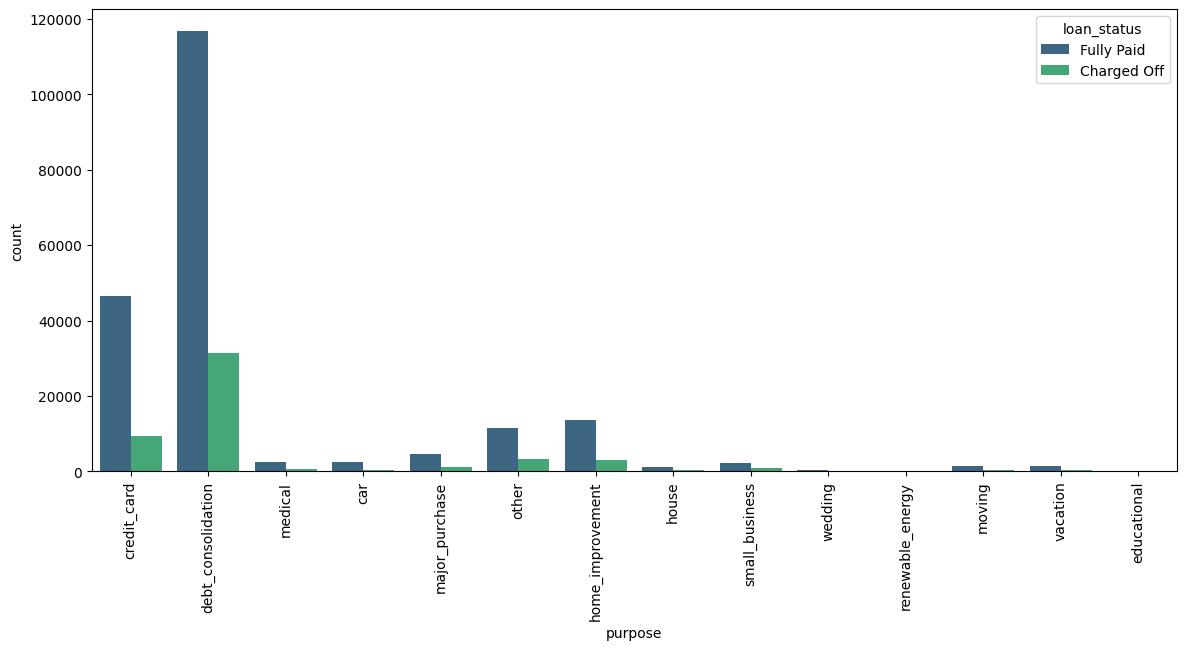

In [166]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='purpose', hue='loan_status', palette='viridis');
plt.xticks(rotation=90);

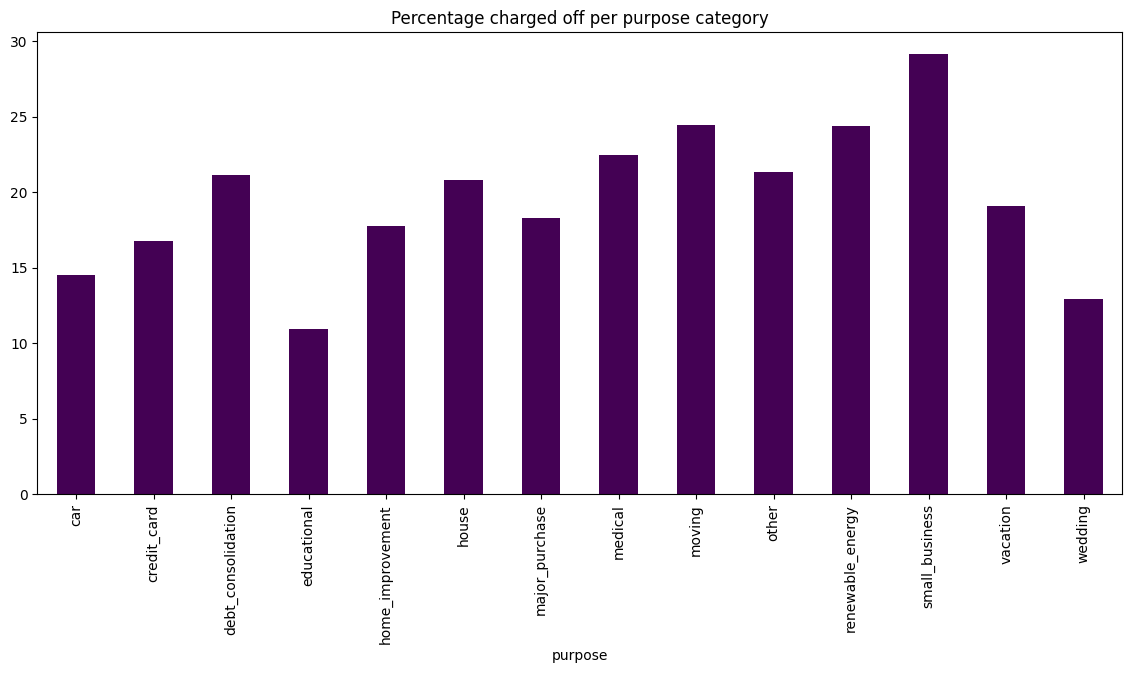

In [167]:
plt.figure(figsize=(14,6))
charged_off = df[df['loan_status']=="Charged Off"].groupby("purpose").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("purpose").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per purpose category");

Let's create dummy variables for these.

In [168]:
dummies_purpose = pd.get_dummies(df['purpose'], drop_first=True)

In [169]:
df = pd.concat([df.drop('purpose', axis=1), dummies_purpose], axis=1)

In [170]:
df.shape

(255207, 119)

## 4.21 term
<a id="4.21"></a>

The number of payments on the loan. Values are in months and can be either 36 or 60.

In [171]:
if_null_values('term')

'No missing values'

In [172]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

Let's convert these strings to integers.

In [173]:
df['term'] = df['term'].apply(lambda x: int(x[0:3]))

<Axes: xlabel='term', ylabel='count'>

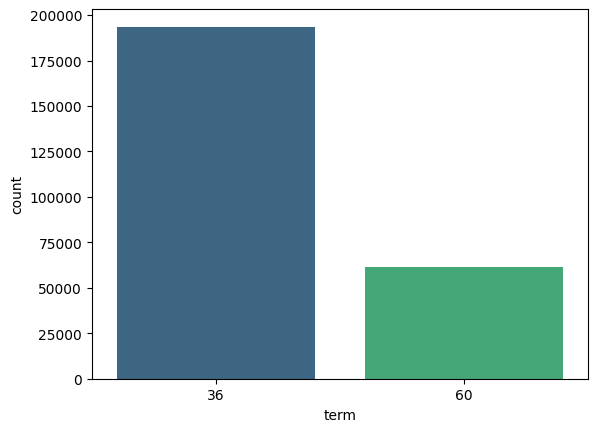

In [174]:
sns.countplot(data=df, x='term', palette='viridis')

We will convert the feature into dummies.

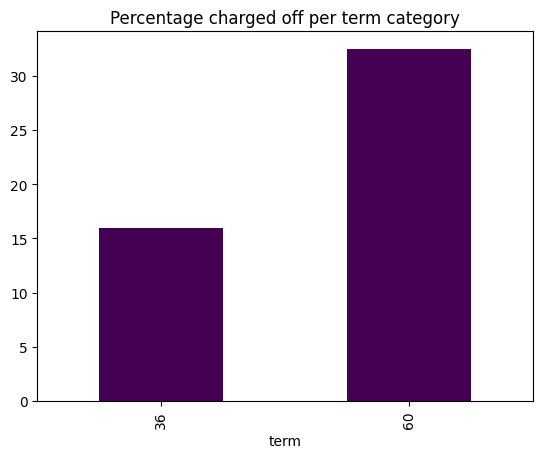

In [175]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("term").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("term").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per term category");

Customers whose loan term was 60 months had almost double chance of charging off.

In [176]:
dummies_term = pd.get_dummies(df['term'], drop_first=True)

In [177]:
pd.concat([df.drop('term', axis=1), dummies_term], axis=1)

,annual_inc,earliest_cr_line,int_rate,loan_amnt,num_actv_bc_tl,loan_status,mort_acc,tot_cur_bal,open_acc,pub_rec,...,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,60
0,95000.0,1997,6.49,28000.0,6.0,Fully Paid,4.0,128583.0,14.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,41579.0,2007,11.47,6300.0,2.0,Charged Off,0.0,12868.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,140000.0,1995,12.12,24000.0,3.0,Fully Paid,1.0,529304.0,10.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,50000.0,2006,11.49,20000.0,4.0,Fully Paid,1.0,198454.0,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,40000.0,2004,14.49,15000.0,5.0,Fully Paid,0.0,27643.0,10.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452132,150000.0,1989,10.64,20000.0,5.0,Fully Paid,2.0,235679.0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,0
452134,80000.0,1998,15.77,24000.0,2.0,Fully Paid,4.0,239866.0,5.0,1.0,...,0,0,0,0,0,0,0,0,0,1
452136,97000.0,1995,11.47,9000.0,4.0,Fully Paid,0.0,127891.0,16.0,0.0,...,0,0,0,0,0,0,0,0,0,0
452137,85000.0,2006,13.98,10000.0,4.0,Charged Off,2.0,210385.0,12.0,0.0,...,0,0,0,0,0,0,0,0,0,1


## 4.22 title
<a id="4.22"></a>

The loan title provided by the borrower.

In [178]:
if_null_values('title')

'% of missing values = 1.26'

In [179]:
len(df['title'].unique())

15107

In [180]:
df['title'].head(10)

0     Credit card refinancing
1          Debt consolidation
2     debt consolidation loan
4          Debt consolidation
5            Medical expenses
6          Debt consolidation
9          Debt consolidation
17    Credit card refinancing
18           CC Consolidation
21              Car financing
Name: title, dtype: object

This feature has a lot of unique values for dummies. Plus this info and the info in feature purpose is closely matching. Lets drop this feature.

In [181]:
df = df.drop('title', axis=1)

In [182]:
df.shape

(255207, 118)

## 4.23 revol_bal
<a id="4.23"></a>

Total credit revolving balance.

In [183]:
if_null_values('revol_bal')

'No missing values'

<Axes: xlabel='revol_bal', ylabel='loan_status'>

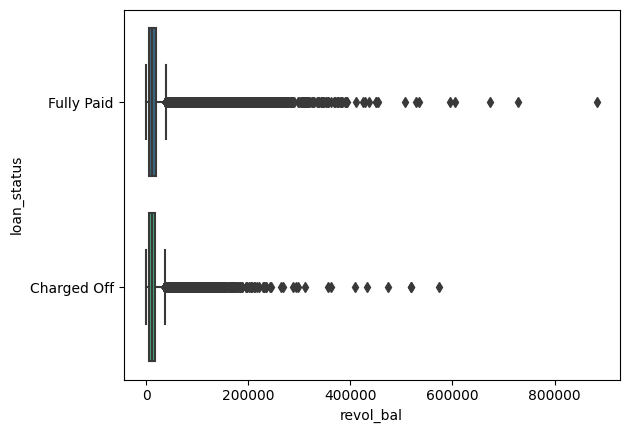

In [184]:
sns.boxplot(data=df, y='loan_status', x='revol_bal', palette='viridis')

There are some outliers. Let's first check how many rows are there with 'revol_bal' > $100000.

In [185]:
len(df[df['revol_bal'] > 100000])

1545

What percentage of total rows is 8098?

In [186]:
len(df[df['revol_bal'] > 100000]) * 100 / len(df)

0.6053909179607142

It's just 0.64%, let's just drop these

In [187]:
df = df[df['revol_bal'] < 100001]

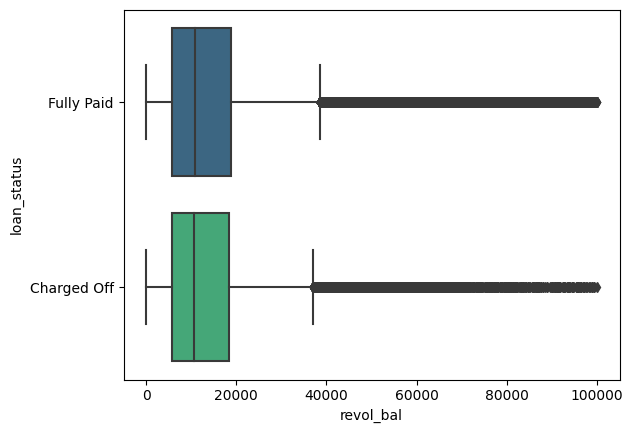

In [188]:
sns.boxplot(data=df, y='loan_status', x='revol_bal', palette='viridis');

There are still some outliers but that's okay because we can't drop a good percentage of rows.

In [189]:
df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50674.0,13910.333189,11970.245805,0.0,5820.0,10706.0,18275.75,99991.0
Fully Paid,202988.0,14398.252532,12900.556536,0.0,5789.0,10774.5,18863.00,99977.0


Difference can be seen in the mean 'revol_bal' between the two 'loan_status' categories. We will go ahead and keep this feature.

## 4.24 revol_util
<a id="4.24"></a>

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [190]:
if_null_values('revol_util')

'% of missing values = 0.06'

Let's fill in the missing values with the mean of non missing values in 'revol_util'.

In [191]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

In [192]:
df['revol_util'].isnull().sum()

0

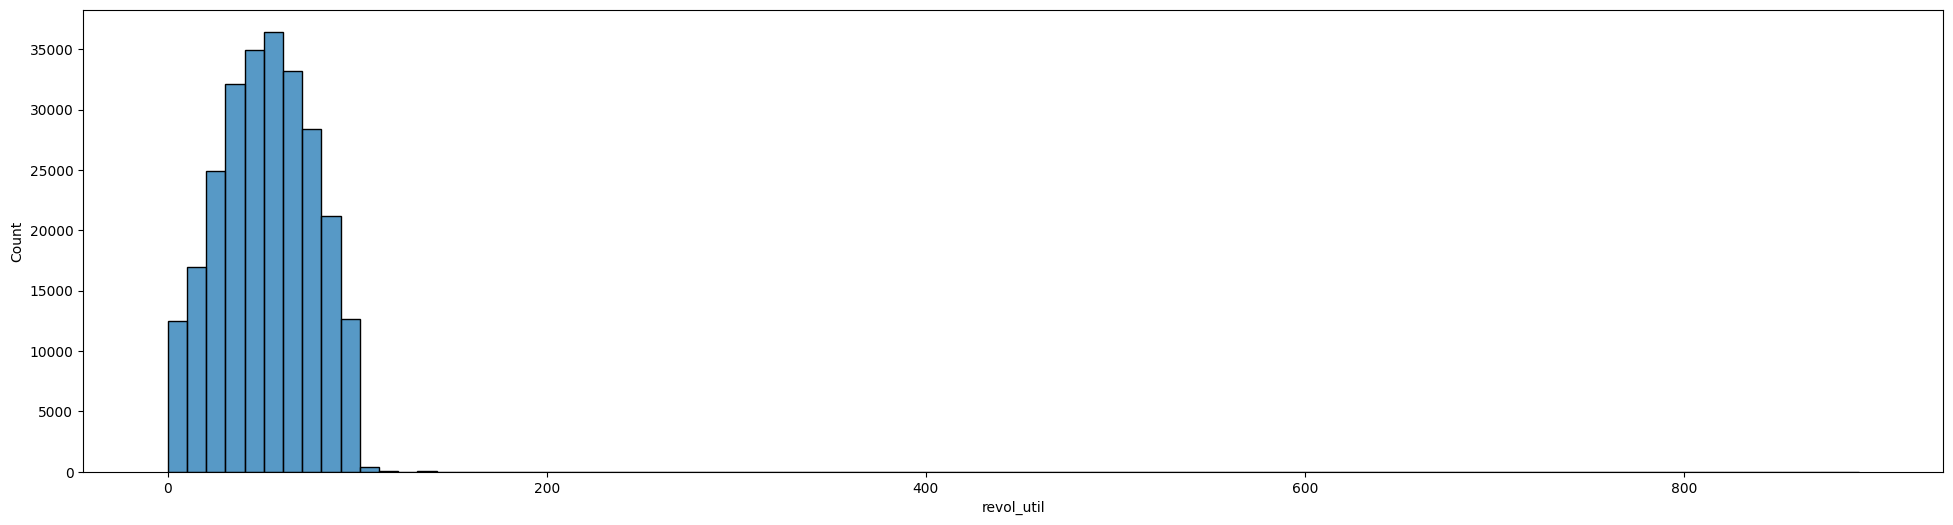

In [193]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='revol_util', bins=88, palette='viridis');

There are some outliers. Let's drop them.

In [194]:
df = df[df['revol_util'] < 150]

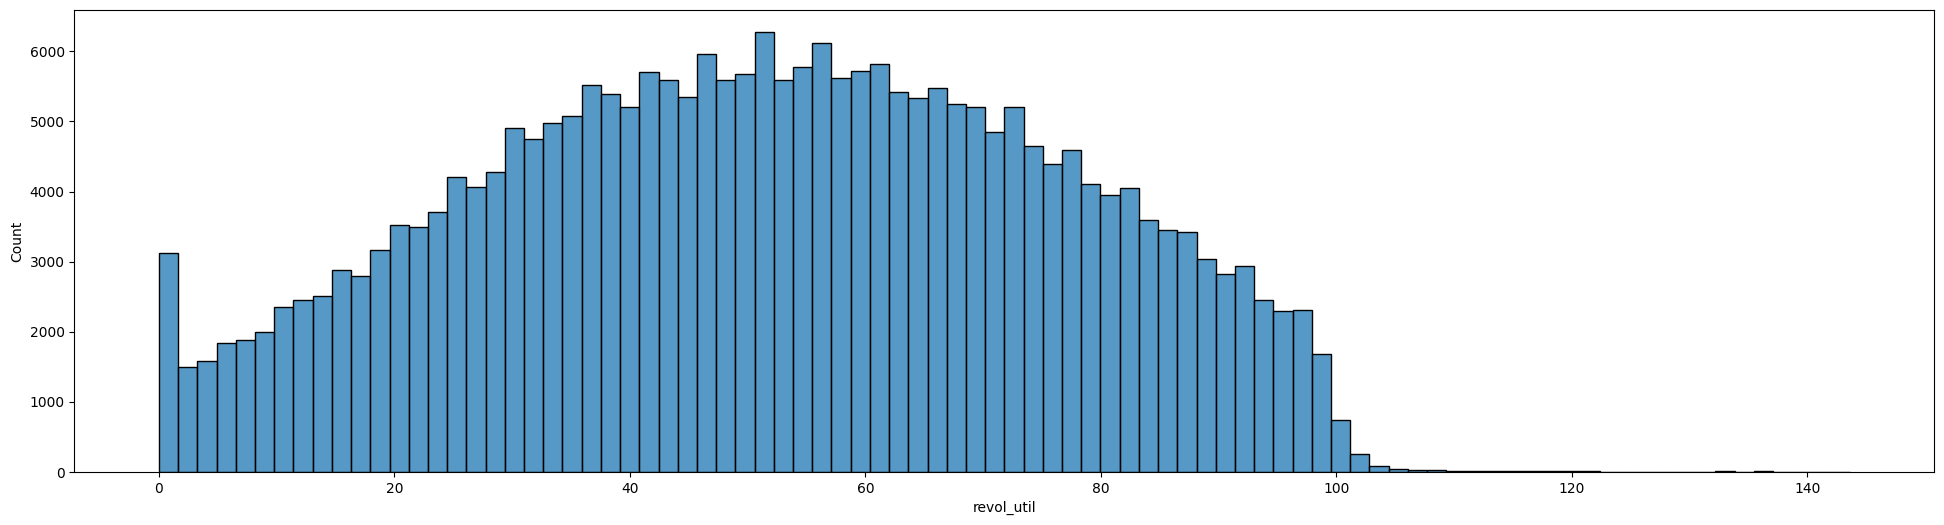

In [195]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='revol_util', bins=88, palette='viridis');

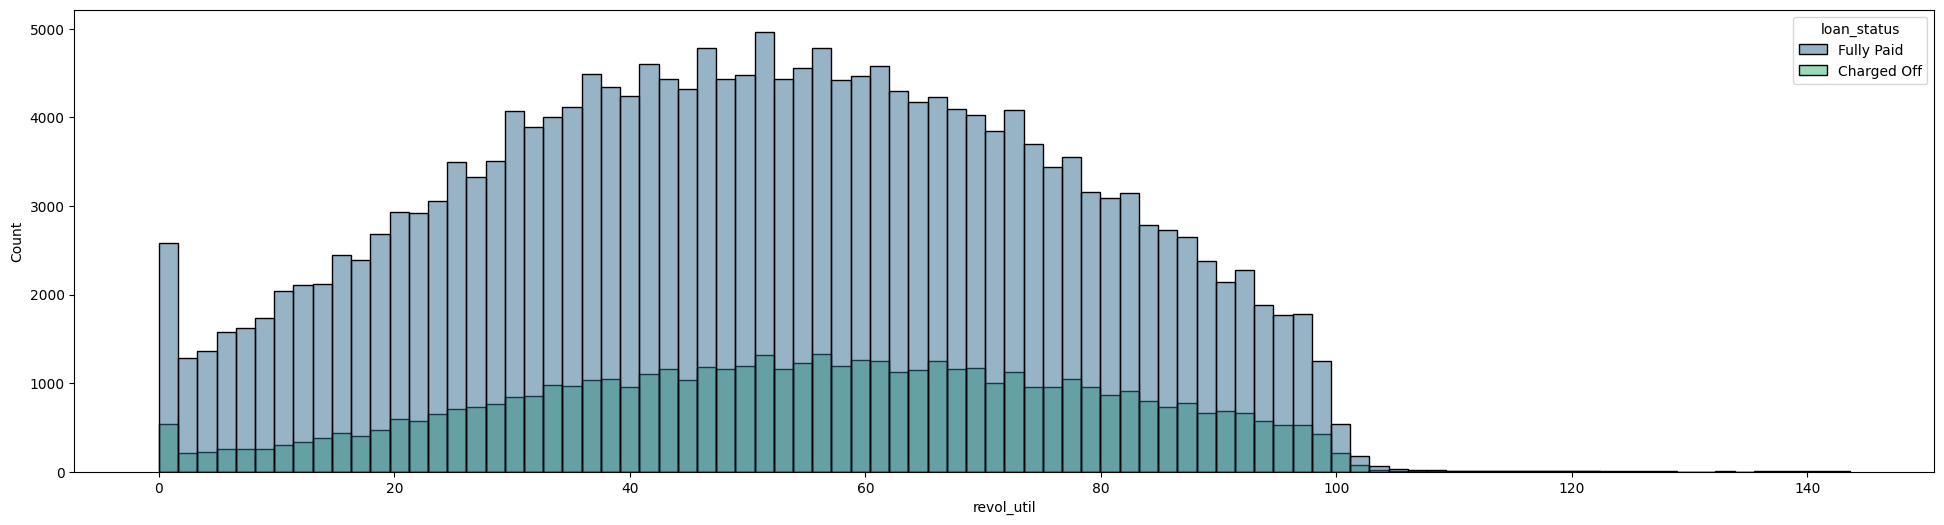

In [196]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='revol_util', bins=88, hue='loan_status', palette='viridis');

<Axes: xlabel='revol_util', ylabel='loan_status'>

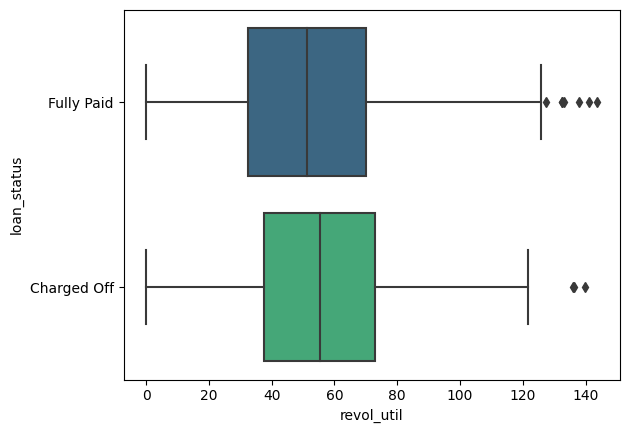

In [197]:
sns.boxplot(data=df, y='loan_status', x='revol_util', palette='viridis')

In [198]:
df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,50672.0,54.785136,23.837804,0.0,37.4,55.5,73.0,139.7
Fully Paid,202983.0,51.039044,24.601033,0.0,32.5,51.2,70.1,143.6


Difference can be seen in the mean 'revol_util' between the two 'loan_status' categories.

## 4.25 verification_status
<a id="4.25"></a>

Indicates if income was verified by LC, not verified, or if the income source was verified.

In [199]:
if_null_values('verification_status')

'No missing values'

In [200]:
df['verification_status'].value_counts()

Source Verified    97969
Not Verified       78024
Verified           77662
Name: verification_status, dtype: int64

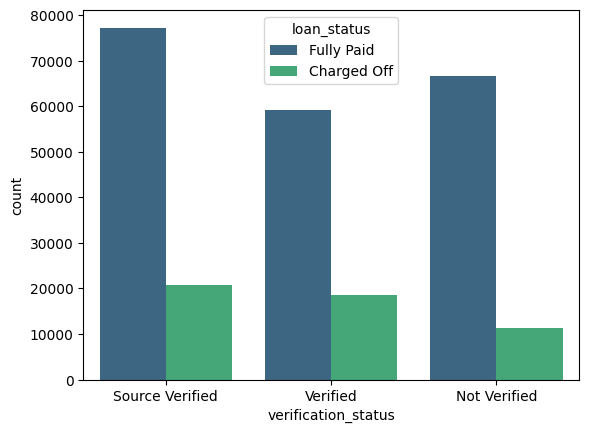

In [201]:
sns.countplot(data=df, x='verification_status', hue='loan_status', palette='viridis');

Let's check percentage charged off per initial_list_status category.

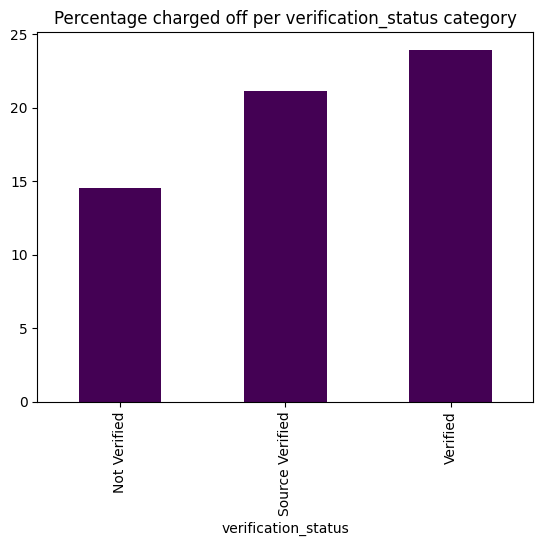

In [202]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("verification_status").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("verification_status").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per verification_status category");

Difference can be seen betweeen percentage charged off per 'initial_list_status' categories.

Let's create dummy variables for this feature.

In [203]:
dummies_verification_status = pd.get_dummies(df['verification_status'], drop_first=True)
df = pd.concat([df.drop('verification_status', axis=1), dummies_verification_status], axis=1)

All features are done, except the feature we want to predict. Let us map the contents in the feature, i.e., 'Fully Paid' and 'Charged Off' to boolean values.

In [204]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [205]:
df['loan_status']

0         1
1         0
2         1
4         1
5         1
         ..
452132    1
452134    1
452136    1
452137    0
452138    1
Name: loan_status, Length: 253655, dtype: int64

In [206]:
df.dtypes.value_counts()

uint8      103
float64     13
int64        3
dtype: int64

# 5. Scaling and Test Train split
<a id="5"></a>

In [207]:
df.shape

(253655, 119)

In [208]:
X = df.drop('loan_status', axis=1)

In [209]:
y = df['loan_status']

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15) # keeping 15% for test

### Scaling

In [212]:
from sklearn.preprocessing import MinMaxScaler

In [213]:
scaler = MinMaxScaler()

In [214]:
X_train = scaler.fit_transform(X_train)

In [215]:
X_test = scaler.transform(X_test)

# 6. Creating Models
<a id="6"></a>

We will try out these models:<br>
XGBoost<br>
Random Forests<br>
ANN

## 6.1 XGBoost
<a id="6.1"></a>

In [216]:
from xgboost import XGBClassifier

In [217]:
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [218]:
preds = model.predict(X_test)

In [224]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report,confusion_matrix


In [222]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.52      0.09      0.15      7691
           1       0.81      0.98      0.89     30358

    accuracy                           0.80     38049
   macro avg       0.67      0.53      0.52     38049
weighted avg       0.75      0.80      0.74     38049



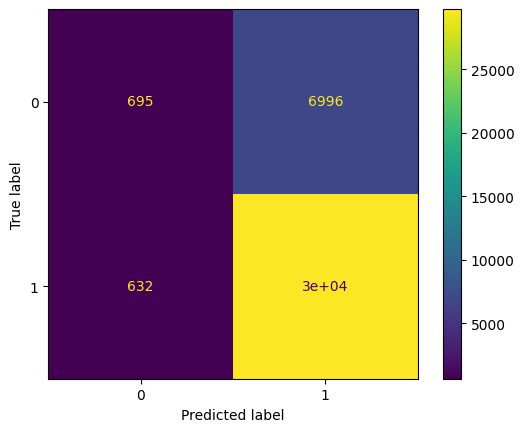

In [230]:
ConfusionMatrixDisplay(confusion_matrix(y_test,preds)).plot()


## 6.2 Random Forests
<a id="6.2"></a>

In [232]:
from sklearn.ensemble import RandomForestClassifier

In [233]:
rf = RandomForestClassifier(n_estimators=100)

In [234]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [237]:
preds = rf.predict(X_test)

In [238]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.53      0.07      0.12      7691
           1       0.81      0.99      0.89     30358

    accuracy                           0.80     38049
   macro avg       0.67      0.53      0.50     38049
weighted avg       0.75      0.80      0.73     38049



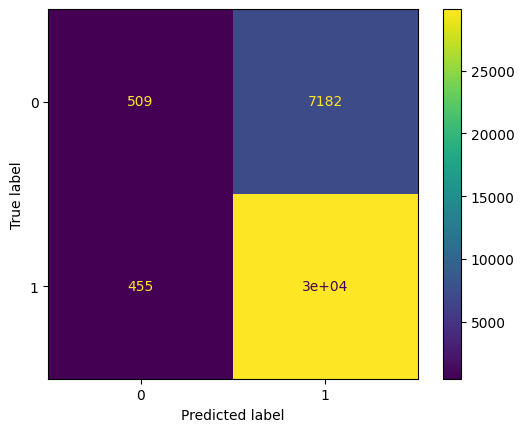

In [240]:
ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test)

## 6.3 ANN
<a id="6.3"></a>

In [270]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout


In [273]:
model = Sequential()

# input layer
model.add(Dense(118,  activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.1))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')


In [274]:
model.fit(x=X_train,
          y=y_train,
          epochs=10,
          batch_size=256,
          validation_data=(X_test, y_test),
          )

Epoch 1/10
843/843 [==============================] - 12s 13ms/step - loss: 0.4702 - val_loss: 0.4594
Epoch 2/10
843/843 [==============================] - 10s 12ms/step - loss: 0.4595 - val_loss: 0.4602
Epoch 3/10
843/843 [==============================] - 14s 16ms/step - loss: 0.4570 - val_loss: 0.4587
Epoch 4/10
843/843 [==============================] - 14s 17ms/step - loss: 0.4552 - val_loss: 0.4579
Epoch 5/10
843/843 [==============================] - 15s 17ms/step - loss: 0.4536 - val_loss: 0.4580
Epoch 6/10
843/843 [==============================] - 13s 16ms/step - loss: 0.4520 - val_loss: 0.4587
Epoch 7/10
843/843 [==============================] - 12s 14ms/step - loss: 0.4504 - val_loss: 0.4596
Epoch 8/10
843/843 [==============================] - 7s 8ms/step - loss: 0.4493 - val_loss: 0.4599
Epoch 9/10
843/843 [==============================] - 7s 9ms/step - loss: 0.4479 - val_loss: 0.4606
Epoch 10/10
843/843 [==============================] - 6s 7ms/step - loss: 0.4465 - va

In [244]:
losses = pd.DataFrame(model.history.history)

<Axes: >

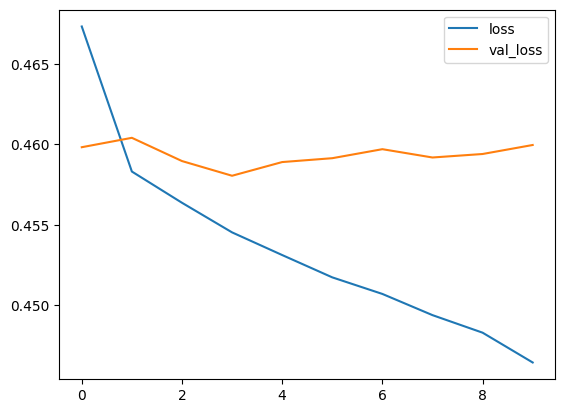

In [245]:
losses[['loss','val_loss']].plot()

In [247]:
from sklearn.metrics import classification_report,confusion_matrix

In [248]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

1190/1190 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.53      0.06      0.11      7691
           1       0.81      0.99      0.89     30358

    accuracy                           0.80     38049
   macro avg       0.67      0.52      0.50     38049
weighted avg       0.75      0.80      0.73     38049



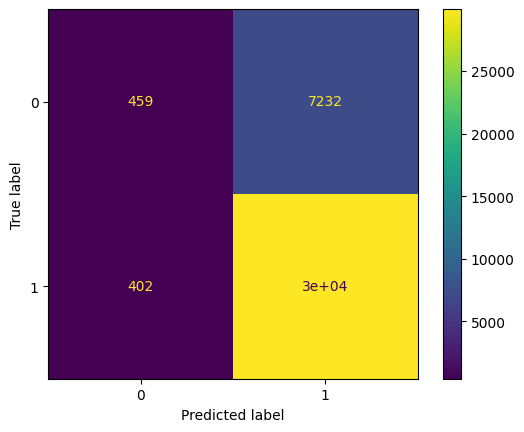

In [250]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,predictions)
ConfusionMatrixDisplay(cm).plot()

In [251]:
predictions = (model.predict(X_test) > 0.7).astype("int32")
print(classification_report(y_test,predictions))

1190/1190 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.39      0.36      0.38      7691
           1       0.84      0.86      0.85     30358

    accuracy                           0.76     38049
   macro avg       0.62      0.61      0.61     38049
weighted avg       0.75      0.76      0.75     38049



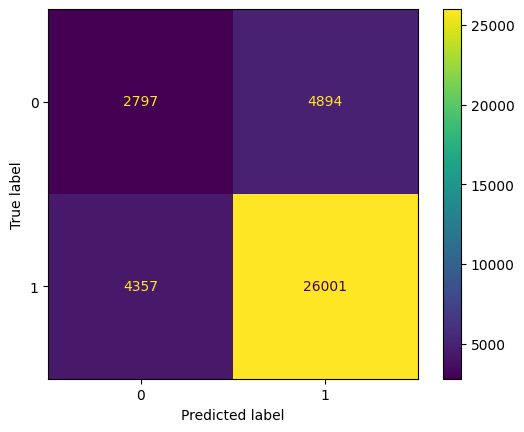

In [266]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,predictions)
ConfusionMatrixDisplay(cm).plot()

# 7. Conclusion
<a id="7"></a>

 ML could predict customer who can be defaulters. At the same time model predicted some customers as charged off even though they could fully pay. Tried to adjust probablity threshold such that model makes less of type 1 error but it would lead to missing charged off customer. So there is trade off.

Further there is scope of model  improvement by introducing more features, feature engineering and good amount of data.